In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
using LsqFit

**Ejemplo de ajuste una curva exponencial a un conjunto de datos**

In [3]:
model(x, p) = p[1]*exp(-x.*p[2])+p[3]
#p es un arreglo de parametros 
xdata = linspace(0,10,20)
ydata = model(xdata, [1.0 2.0 3]) + 0.01*randn(length(xdata));

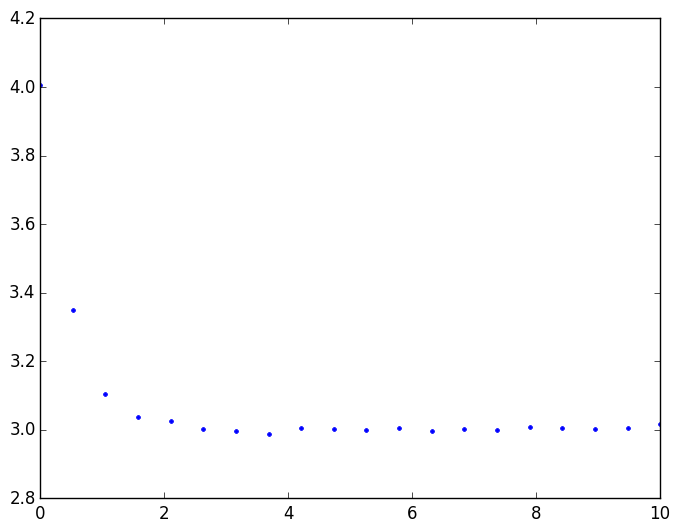

In [4]:
plot(xdata,ydata,"b.");

In [5]:
fit = curve_fit(model, xdata, ydata, [0.5, 0.5,0.5])
# fit is a composite type (LsqFitResult), with some interesting values:
#   fit.dof: degrees of freedom
#   fit.param: best fit parameters
#   fit.resid: residuals = vector of residuals
#   fit.jacobian: estimated Jacobian at solution;
errors = estimate_errors(fit, 0.95) #Esto calcula la incertidumbre en los parametros ajustados.

3-element Array{Float64,1}:
 0.0132768 
 0.0648897 
 0.00326322

In [6]:
p=fit.param
println(p),println(errors)

[1.0058333420358962,2.0697312821852827,3.002433112418387]
[0.013276810226244872,0.06488967589323634,0.0032632202988237403]


(nothing,nothing)

In [7]:
x=linspace(0,10,100)
y=p[1]exp(-x*p[2])+p[3];

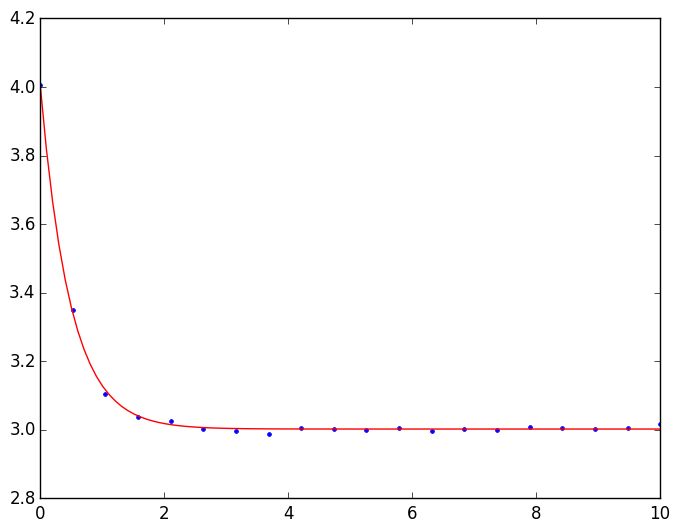

In [8]:
plot(xdata,ydata,"b.")
plot(x,y,"r");

Termina el ejemplo
#Comienza analisis del experimento.

##-) Corridas 67mA, 69.1mA, 69.1mA

In [3]:
sixtyV = readdlm("60Vlog.dat") #archivos para graficar el logaritmo de la corriente. En estos archivos descarto las 
sixtymA=readdlm("60mAlog.dat") #corrientes negativas para que no haya problemas en el dominio de la función log.
fiftymA=readdlm("50mAlog.dat")
fourtymA=readdlm("40mAlog.dat");

In [4]:
println(size(sixtyV)),println(size(sixtymA)),println(size(fiftymA)),println(size(fourtymA));

(38,4)
(43,4)
(43,4)
(44,4)


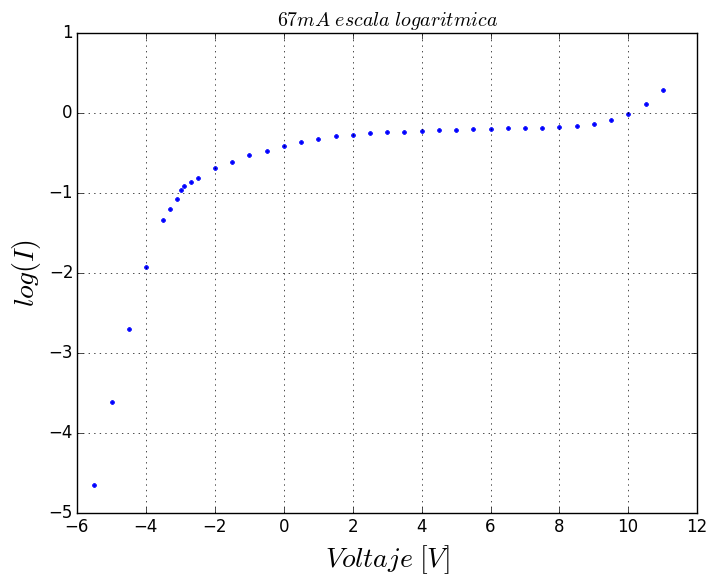

In [4]:
V1=zeros(38)
I1=zeros(38)
for i in 1:38
    V1[i]=sixtyV[i,1]
    I1[i]=sixtyV[i,2]
end 
plot(V1,log(I1),"b.")
title(L"67mA \ escala \ logaritmica")
xlabel(L"Voltaje \ [V]",size=20)
ylabel(L"log(I)",size=20);
grid("on")

In [5]:
model(x,p)=p[1]x+p[2] #queremos ajustar una recta en la grafica semilog
m=5 #numero de puntos con los que se sjusta la recta en la region C
x1=zeros(m)
y1=zeros(m)
for i in 1:m #PARA HACER UN MEJOR AJUSTE HAY QUE JUGAR CON LOS PUNTOS DE LA RECTA QUE SE ESCOGEN 
    x1[i]=V1[i] 
    y1[i]=I1[i]
end 
fit1=curve_fit(model,x1,log(y1),[0.5,0.5])
p1=fit1.param

n=21 #numero de puntos con los que se ajusta la curva en la región E
x2=zeros(n)
y2=zeros(n)
for i in 1:n
    x2[i]=V1[i+14]
    y2[i]=I1[i+14]
end 

fit2=curve_fit(model,x2,log((y2)),[0.5,0.5])
p2=fit2.param

x1=linspace(-6,-2,30)
y1=(p1[1]x1+p1[2])
x2=linspace(-6,12,30)
y2=(p2[1]x2+p2[2])
errors1 = estimate_errors(fit1, 0.12)
errors2=estimate_errors(fit2,0.998)
println(p1),println(p2)

println(errors1),println(errors2);


[1.6580925061610183,4.6155905276244376]
[0.027446499480085016,-0.3637980680021296]
[-0.15144493178421722,-0.6898644959624968]
[0.008861830388791861,0.04806402791905029]


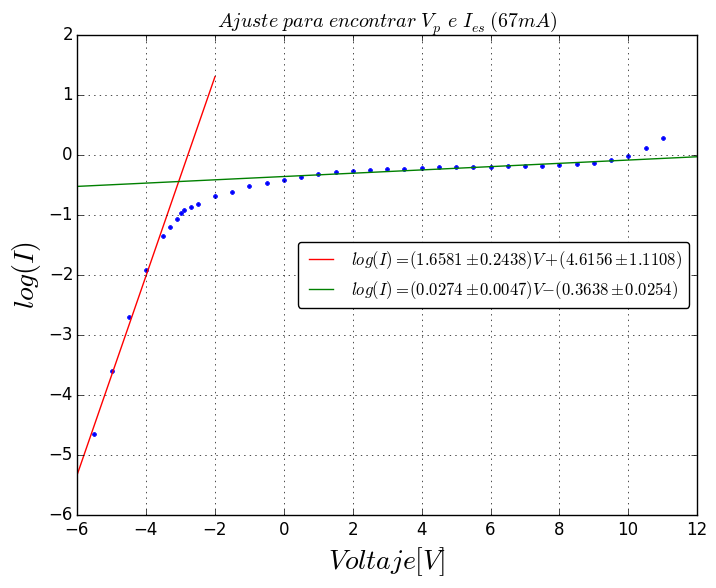

In [6]:
plot(V1,log(I1),"b.")
plot(x1,y1,"r",label=L"log(I)=(1.6581 \pm 0.2438)V +(4.6156 \pm 1.1108)")
plot(x2,y2,"g",label=L"log(I)=(0.0274 \pm 0.0047)V-(0.3638 \pm 0.0254)")
title(L"Ajuste \ para \ encontrar \ V_p \ e  \ I_{es} \ (67mA)")
legend(loc="center right",fancybox="true",fontsize="medium")
xlabel(L"Voltaje[V]",size=20)
ylabel(L"log(I)",size=20)
grid("on") 

In [7]:
#determinar la intersección de las rectas para intersección de las rectas

Vp=(p2[2]-p1[2])/(p1[1]-p2[1]) 
logVp=model(Vp,p1) #evaluamos cualquiera de las dos rectas definidas por la función model, y encontramos el logaritmo 
                    #de Vp que es el punto que aparece en la grafica anterior 
Ip=exp(logVp)
println("log(Vp) es ",logVp)
println("El voltaje flotante es ",Vp, " V"),println("La corriente de saturación de electrones es ",Ip, " mA");

#Incertidumbres
a=-(p2[2]-p1[2])/((p1[1]-p2[1])^2)
b=-1/(p1[1]-p2[1])
c=(p2[2]-p1[2])/((p1[1]-p2[1])^2)
d=-b
suma=a^2*(errors1[1]^2)+b^2*(errors1[2]^2)+c^2*(errors2[1]^2)+b^2*(errors2[2]^2)
dVp=sqrt(suma)

f=exp(logVp)*(Vp+a)
g=exp(logVp)*(p1[1]*b+1)
h=exp(logVp)*(p1[1]*c)
j=exp(logVp)*p1[1]*d
suma=f^2*(errors1[1]^2)+g^2*(errors1[2]^2)+h^2*(errors2[1]^2)+j^2*(errors2[2]^2)
dIp=sqrt(suma)

println("La incertidumbre de Vp es ",dVp," V")
println("La incertidumbre en la corriente de saturación de electrones Ies resulta en ", dIp," mA")



log(Vp) es -0.44760950588691095
El voltaje flotante es -3.053629405294265 V
La corriente de saturación de electrones es 0.6391542212680956 mA
La incertidumbre de Vp es 0.5104474461262302 V
La incertidumbre en la corriente de saturación de electrones Ies resulta en 0.1200335331930614 mA


###Cálculo de la temperartura del plasma y de la densidad electrónica

A continuación ***se calcula la temperatura del plasma*** a partir de las ecuaciones que aparecen en el articulo de Merlino y de Langmuir´s probe (Eq (5.69)). Las ecuaciones son las siguientes:


$$  \large T_e=\frac{2e(V_p-V_f)}{kln(\frac{2M_i}{\pi m})} \  \ \ (5.69)$$

$$ \large V_f=V_p+(\frac{kT_e}{e})ln \left( 0.6\sqrt[]{\frac{2\pi m_e}{m_i}} \right) \ \ \ (8) \ de \ merlino$$

$$  \large \Rightarrow  T_e=\frac{\frac{e}{k}(V_f-V_p)}{ln \left( 0.6\sqrt[]{\frac{2\pi m_e}{M_i}} \right)} $$

Segunda de Merlino:

$$ \large T_e=\frac{(V_2-V_1)}{ln(\frac{I_{e2}}{I_{e1}})}  $$ 

Donde los subíndices 1 y 2 en la última ecuación se refierena dos puntos cualesquiera que están sobre la recta ajustada a la región C (rectas de color rojo).

Estas **tres temperaturas se compararán** con el inverso de la pendiente de la recta ajustada ya que segun el articulo de Langumuires probes la temperatura está dada por el inverso de la pendiente a la recta ajustada con la siguiente ecuación (6):

$$ \large I_p=mV_p+b \Rightarrow m=\frac{dI_p}{dV_p}=\frac{1}{T_e}$$

Finalmente se calcula la densidad electronica con las ecuaciones (5.32) y (5.36) del articulo de Langmuir´s Probe

$$ \large I_p=I_{es}=eA\frac{1}{4}n_e\sqrt[]{\frac{8kT_e}{\pi m}}$$

$$ \large \Rightarrow n_e=\frac{4I_{es}}{eA}\sqrt[]{\frac{m_e \pi}{8kT_e}}$$
Con A el área de la punta de Langmuir utilizada.

In [8]:
using constants

In [9]:
#parametros 

k=k_boltz #constante de boltzman 
me=m_electron #masa del electron 
e=e_electron #carga del electron 
M=6.634e-26 #masa de los iones de Argon (gas dentro del triodo )
 #voltaje flotante;

In [10]:
#1
Vf=-6.51
T1=(2*e/k)*(Vp-Vf)/log(2M/(π*me)) #Langmuir´s probe (5.69)
a=(2*e/k)/log(2M/(π*me))
b=(-2*e/k)/log(2M/(π*me))
dT1=sqrt(a^2*dVp^2+b^2*0.05^2)
#2
T2=(e/k)*(Vf-Vp)/log(0.6*sqrt(2*π*me/M)) #Merlino (8)
a=(e/k)/log(0.6*sqrt(2*π*me/M))
b=-a
dT2=sqrt(a^2*0.05^2+b^2*dVp^2)
#3
Ie2=exp(model(-5,p1))
Ie1=exp(model(-4,p1))
T3=(-5+4)/log(Ie2/Ie1) #le falta un factor de e/k

a=1/log(Ie2/Ie1)
b=-a
c=(-5+4)/(Ie1*(log(Ie2/Ie1)^2))
d=(-4+5)*(Ie2/Ie1^2)/(log(Ie2/Ie1)^2)
dT3=sqrt(a^2*0.05^2+b^2*0.05+c^2*0.05^2^2+d^2*0.05^2)
println("T1= ",T1," +/- ",dT1," Kelvin")
println("T2= ",T2," +/- ",dT2," Kelvin")
println("T3= ",T3," +/- ",dT3,"en electron Volts")
println("T3= ",(e/k)*T3," +/- ",(e/k)*dT3," Kelvin")
println("Por otro aldo el inverso de la pendiente ajustada da una tempreatura de ", (e/k)*1/p1[1]," +/- ", (e/k)*sqrt((1/p1[1]^4)*errors1[1]^2))
Te=(T1+T2+(e/k)*T3)/3
dTe=sqrt((dT1)^2+(dT2)^2+(dT3)^2)
Tp67=Te
dTp67=dTe
println("El promedio de estas temperaturas es ",Te, " +/- ",dTe," Kelvin")
#faltan las incertidumbres de estas mediciones y la densidad de electrones

T1= 7466.232678598414 +/- 1107.9134019793553 Kelvin
T2= 7728.526952435561 +/- 1146.8352188790093 Kelvin
T3= 0.6031026594018568 +/- 0.140784906254087en electron Volts
T3= 6998.7164526042525 +/- 1633.7411621696995 Kelvin
Por otro aldo el inverso de la pendiente ajustada da una tempreatura de 6998.716452604254 +/- 639.2406526194145
El promedio de estas temperaturas es 7397.825361212742 +/- 1594.5855716665455 Kelvin


In [11]:
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Te))
Ne=sq*(4*Ip*0.001)/(e*A) #Densidad de electrones multiplique por el factor 0.001 por que la corriente está en mA
a=sq*4/(e*A)
b=4*Ip*0.001/(2*(sq)*e*A)
c=a*(1/A)
dNe=sqrt(a^2*(dIp*0.001)^2+b^2*dTe+c^2*dA^2) #INCERTIDUMBRE HORRIBLE!!!!

println("La densidad de electrones es ",Ne," +/- ",dNe)


La densidad de electrones es 3.711204434430357e18 +/- 2.1156666921629975e31


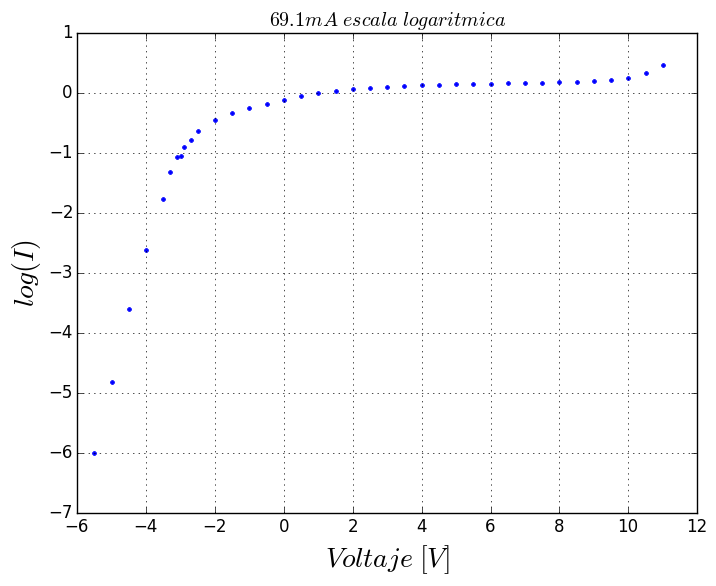

In [12]:
V2=zeros(38)
I2=zeros(38)
for i in 1:38
    V2[i]=sixtyV[i,1]
    I2[i]=sixtyV[i,3]
end 
plot(V2,log(I2),"b.")
title(L"69.1mA \ escala \ logaritmica")
xlabel(L"Voltaje \ [V]",size=20)
ylabel(L"log(I)",size=20);
grid("on")

In [13]:
model(x,p)=p[1]x+p[2] #queremos ajustar una recta en la grafica semilog
m=6 #numero de puntos con los que se sjusta la recta en la region C
x1=zeros(m)
y1=zeros(m)
for i in 1:m #PARA HACER UN MEJOR AJUSTE HAY QUE JUGAR CON LOS PUNTOS DE LA RECTA QUE SE ESCOGEn CON LOS INDICES 
    x1[i]=V2[i] #DE DONDE A DONDE CORRE LA i
    y1[i]=I2[i]
end 
fit1=curve_fit(model,x1,log(y1),[0.5,0.5])
p1=fit1.param

n=20 #numero de puntos con los que se ajusta la curva en la región E
x2=zeros(n)
y2=zeros(n)
for i in 1:n
    x2[i]=V2[i+15]
    y2[i]=I2[i+15]
end 

fit2=curve_fit(model,x2,log((y2)),[0.5,0.5])
p2=fit2.param

x1=linspace(-6,-2,30)
y1=(p1[1]x1+p1[2])
x2=linspace(-6,12,30)
y2=(p2[1]x2+p2[2])
errors1 = estimate_errors(fit1, 0.95)
errors2=estimate_errors(fit2,0.95)
println(p1),println(p2)

println(errors1),println(errors2);


[2.1035640560095303,5.686404011012242]
[0.02658464830278427,-0.017770306590352235]
[0.14480221845540386,0.6329474857525826]
[0.004796145330697163,0.026649914348355085]


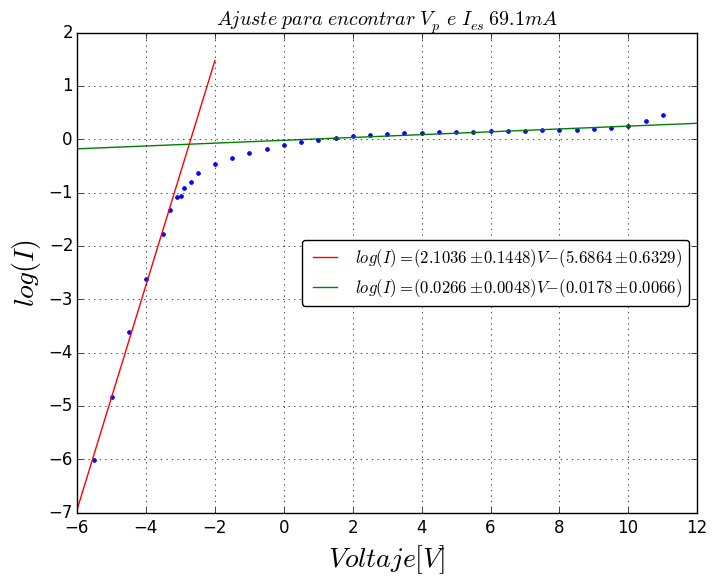

In [14]:
plot(V2,log(I2),"b.")
plot(x1,y1,"r",label=L"log(I)=(2.1036\pm 0.1448) V-(5.6864 \pm 0.6329)")
plot(x2,y2,"g",label=L"log(I)=(0.0266 \pm 0.0048)V-(0.0178 \pm 0.0066)")
title(L"Ajuste \ para \ encontrar \ V_p \ e  \ I_{es} \ 69.1mA")
legend(loc="center right",fancybox="true",fontsize="medium")
xlabel(L"Voltaje[V]",size=20)
ylabel(L"log(I)",size=20)
grid("on")  #QUIZAS PUEDA AJUSTAR MEJOR LA RECTA AZUL

In [15]:
#determinar la intersección de las rectas para intersección de las rectas

Vp=(p2[2]-p1[2])/(p1[1]-p2[1]) 
logVp=model(Vp,p1) #evaluamos cualquiera de las dos rectas definidas por la función model, y encontramos el logaritmo 
                    #de Vp que es el punto que aparece en la grafica anterior 
Ip=exp(logVp)
println(logVp)
println("El voltaje flotante es ",Vp," V"),println("La corriente de saturación de electrones es ",Ip,"mA");

#Incertidumbres
a=-(p2[2]-p1[2])/((p1[1]-p2[1])^2)
b=-1/(p1[1]-p2[1])
c=(p2[2]-p1[2])/((p1[1]-p2[1])^2)
d=-b
suma=a^2*(errors1[1]^2)+b^2*(errors1[2]^2)+c^2*(errors2[1]^2)+b^2*(errors2[2]^2)
dVp=sqrt(suma)

f=exp(logVp)*(Vp+a)
g=exp(logVp)*(p1[1]*b+1)
h=exp(logVp)*(p1[1]*c)
j=exp(logVp)*p1[1]*d
suma=f^2*(errors1[1]^2)+g^2*(errors1[2]^2)+h^2*(errors2[1]^2)+j^2*(errors2[2]^2)
dIp=sqrt(suma)

println("La incertidumbre de Vp es ",dVp," V")
println("La incertidumbre en la corriente de saturación de electrones Ies resulta en ", dIp," mA")

-0.09078184802815237
El voltaje flotante es -2.746379813125225 V
La corriente de saturación de electrones es 0.9132169092401957mA
La incertidumbre de Vp es 0.36018765852334367 V
La incertidumbre en la corriente de saturación de electrones Ies resulta en 0.1904554122170113 mA


In [16]:
#1
Vf=-6
T1=(2*e/k)*(Vp-Vf)/log(2M/(π*me))
a=(2*e/k)/log(2M/(π*me))
b=(-2*e/k)/log(2M/(π*me))
dT1=sqrt(a^2*dVp^2+b^2*0.05^2)
#2
T2=(e/k)*(Vf-Vp)/log(0.6*sqrt(2*π*me/M))
a=(e/k)/log(0.6*sqrt(2*π*me/M))
b=-a
dT2=sqrt(a^2*0.05^2+b^2*dVp^2)
#3
Ie2=exp(model(-5,p1))
Ie1=exp(model(-4,p1))
T3=(-5+4)/log(Ie2/Ie1) #le falta un factor de e/k

a=1/log(Ie2/Ie1)
b=-a
c=(-5+4)/(Ie1*(log(Ie2/Ie1)^2))
d=(-4+5)*(Ie2/Ie1^2)/(log(Ie2/Ie1)^2)
dT3=sqrt(a^2*0.05^2+b^2*0.05+c^2*0.05^2^2+d^2*0.05^2)
println("T1= ",T1," +/- ",dT1," Kelvin")
println("T2= ",T2," +/- ",dT2," Kelvin")
println("T3= ",T3," +/- ",dT3,"en electron Volts")
println("T3= ",(e/k)*T3," +/- ",(e/k)*dT3," Kelvin")
println("Por otro aldo el inverso de la pendiente ajustada da una tempreatura de ", (e/k)*1/p1[1]," +/- ", (e/k)*sqrt((1/p1[1]^4)*errors1[1]^2))
Te=(T1+T2+(e/k)*T3)/3
dTe=sqrt((dT1)^2+(dT2)^2+(dT3)^2)
Tp691=Te
dTp691=dTe
println("El promedio de estas temperaturas es ",Te, " +/- ",dTe," Kelvin")
#faltan las incertidumbres de estas mediciones y la densidad de electrones.

T1= 7028.264098821296 +/- 785.5153453174987 Kelvin
T2= 7275.1722126576415 +/- 813.1110801354854 Kelvin
T3= 0.4753836695123059 +/- 0.11128424498662101en electron Volts
T3= 5516.598969095699 +/- 1291.4001690457626 Kelvin
Por otro aldo el inverso de la pendiente ajustada da una tempreatura de 5516.598969095698 +/- 379.7439715571142
El promedio de estas temperaturas es 6606.678426858212 +/- 1130.567998287829 Kelvin


In [17]:
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Te))
Ne=sq*(4*Ip*0.001)/(e*A) #Densidad de electrones multiplique por el factor 0.001 por que la corriente está en mA
a=sq*4/(e*A)
b=4*Ip*0.001/(2*(sq)*e*A)
c=a*(1/A)
dNe=sqrt(a^2*(dIp*0.001)^2+b^2*dTe+c^2*dA^2) #INCERTIDUMBRE HORRIBLE!!!!

println("La densidad de electrones es ",Ne," +/- ",dNe)

La densidad de electrones es 5.611043225848485e18 +/- 2.4053568038524433e31


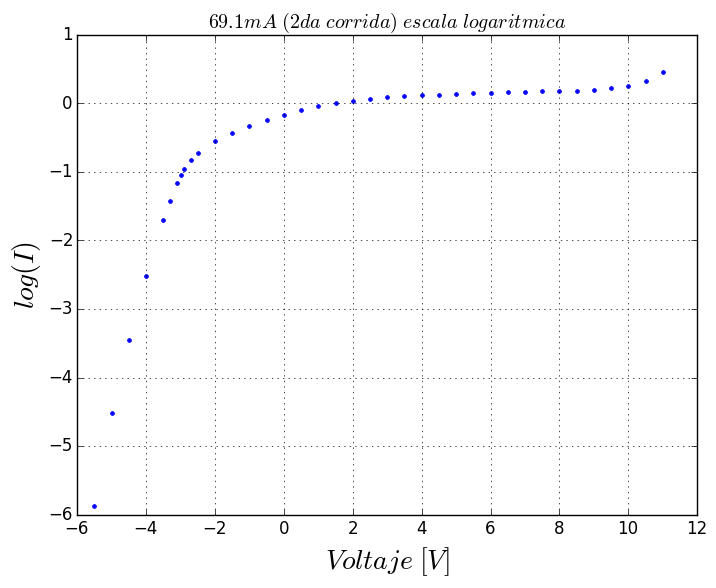

In [18]:
V3=zeros(38)
I3=zeros(38)
for i in 1:38
    V3[i]=sixtyV[i,1]
    I3[i]=sixtyV[i,4]
end 
plot(V3,log(I3),"b.")
title(L"69.1mA  \ (2da \ corrida) \ escala \ logaritmica")
xlabel(L"Voltaje \ [V]",size=20)
ylabel(L"log(I)",size=20);
grid("on")

In [19]:
model(x,p)=p[1]x+p[2] #queremos ajustar una recta en la grafica semilog
m=6 #numero de puntos con los que se sjusta la recta en la region C
x1=zeros(m)
y1=zeros(m)
for i in 1:m #PARA HACER UN MEJOR AJUSTE HAY QUE JUGAR CON LOS PUNTOS DE LA RECTA QUE SE ESCOGEn CON LOS INDICES 
    x1[i]=V3[i] #DE DONDE A DONDE CORRE LA i
    y1[i]=I3[i]
end 
fit1=curve_fit(model,x1,log(y1),[0.5,0.5])
p1=fit1.param

n=21#numero de puntos con los que se ajusta la curva en la región E
x2=zeros(n)
y2=zeros(n)
for i in 1:n
    x2[i]=V3[i+14]
    y2[i]=I3[i+14]
end 

fit2=curve_fit(model,x2,log((y2)),[0.5,0.5])
p2=fit2.param

x1=linspace(-6,-2,30)
y1=(p1[1]x1+p1[2])
x2=linspace(-6,12,30)
y2=(p2[1]x2+p2[2])
errors1 = estimate_errors(fit1, 0.95)
errors2=estimate_errors(fit2,0.95)
println(p1),println(p2)

println(errors1),println(errors2);


[1.9915933820096616,5.31589464796062]
[0.03691472553195557,-0.08608140047211413]
[0.22081802963926878,0.9652215149745108]
[0.0070108102761152445,0.038024625394638474]


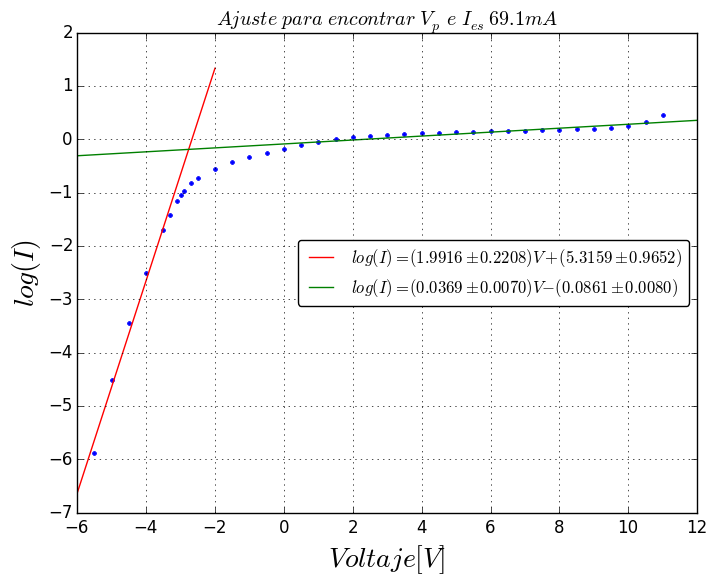

In [20]:
plot(V3,log(I3),"b.")
plot(x1,y1,"r",label=L"log(I)=(1.9916 \pm 0.2208)V+(5.3159 \pm 0.9652)")
plot(x2,y2,"g",label=L"log(I)=(0.0369 \pm 0.0070)V-(0.0861 \pm 0.0080)")
title(L"Ajuste \ para \ encontrar \ V_p \ e  \ I_{es} \ 69.1mA")
legend(loc="center right",fancybox="true",fontsize="medium")
xlabel(L"Voltaje[V]",size=20)
ylabel(L"log(I)",size=20)
grid("on")  #QUIZAS PUEDA AJUSTAR MEJOR LA RECTA AZUL

In [21]:
#determinar la intersección de las rectas para intersección de las rectas

Vp=(p2[2]-p1[2])/(p1[1]-p2[1]) 
logVp=model(Vp,p1) #evaluamos cualquiera de las dos rectas definidas por la función model, y encontramos el logaritmo 
                    #de Vp que es el punto que aparece en la grafica anterior 
Ip=exp(logVp)
println(logVp)
println("El voltaje flotante es ",Vp),println("La corriente de saturación de electrones es ",Ip);

#Incertidumbres
a=-(p2[2]-p1[2])/((p1[1]-p2[1])^2)
b=-1/(p1[1]-p2[1])
c=(p2[2]-p1[2])/((p1[1]-p2[1])^2)
d=-b
suma=a^2*(errors1[1]^2)+b^2*(errors1[2]^2)+c^2*(errors2[1]^2)+b^2*(errors2[2]^2)
dVp=sqrt(suma)

f=exp(logVp)*(Vp+a)
g=exp(logVp)*(p1[1]*b+1)
h=exp(logVp)*(p1[1]*c)
j=exp(logVp)*p1[1]*d
suma=f^2*(errors1[1]^2)+g^2*(errors1[2]^2)+h^2*(errors2[1]^2)+j^2*(errors2[2]^2)
dIp=sqrt(suma)

println("La incertidumbre de Vp es ",dVp)
println("La incertidumbre en la corriente de saturación de electrones Ies resulta en ", dIp)

-0.18809942911188493
El voltaje flotante es -2.763613359429111
La corriente de saturación de electrones es 0.8285323229040139
La incertidumbre de Vp es 0.5846247946251429
La incertidumbre en la corriente de saturación de electrones Ies resulta en 0.2500172907885358


In [22]:
#1 TEMPERATURAS
Vf=-6
T1=(2*e/k)*(Vp-Vf)/log(2M/(π*me))
a=(2*e/k)/log(2M/(π*me))
b=(-2*e/k)/log(2M/(π*me))
dT1=sqrt(a^2*dVp^2+b^2*0.05^2)
#2
T2=(e/k)*(Vf-Vp)/log(0.6*sqrt(2*π*me/M))
a=(e/k)/log(0.6*sqrt(2*π*me/M))
b=-a
dT2=sqrt(a^2*0.05^2+b^2*dVp^2)
#3
Ie2=exp(model(-5,p1))
Ie1=exp(model(-4,p1))
T3=(-5+4)/log(Ie2/Ie1) #le falta un factor de e/k

a=1/log(Ie2/Ie1)
b=-a
c=(-5+4)/(Ie1*(log(Ie2/Ie1)^2))
d=(-4+5)*(Ie2/Ie1^2)/(log(Ie2/Ie1)^2)
dT3=sqrt(a^2*0.05^2+b^2*0.05+c^2*0.05^2^2+d^2*0.05^2)
println("T1= ",T1," +/- ",dT1," Kelvin")
println("T2= ",T2," +/- ",dT2," Kelvin")
println("T3= ",T3," +/- ",dT3,"en electron Volts")
println("T3= ",(e/k)*T3," +/- ",(e/k)*dT3," Kelvin")
println("Por otro aldo el inverso de la pendiente ajustada da una tempreatura de ", (e/k)*1/p1[1]," +/- ", (e/k)*sqrt((1/p1[1]^4)*errors1[1]^2))
Te=(T1+T2+(e/k)*T3)/3
dTe=sqrt((dT1)^2+(dT2)^2+(dT3)^2)
Tp692=Te
dTp692=dTe
println("El promedio de estas temperaturas es ",Te, " +/- ",dTe," Kelvin")
#faltan las incertidumbres de estas mediciones y la densidad de electrones.

T1= 6991.0372844341755 +/- 1267.4796490273 Kelvin
T2= 7236.637592759057 +/- 1312.0071461541895 Kelvin
T3= 0.5021105256891987 +/- 0.11793736708280039en electron Volts
T3= 5826.75128750385 +/- 1368.6064528348209 Kelvin
Por otro aldo el inverso de la pendiente ajustada da una tempreatura de 5826.751287503848 +/- 646.0413807995022
El promedio de estas temperaturas es 6684.808721565695 +/- 1824.2443438770067 Kelvin


In [23]:
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Te))
Ne=sq*(4*Ip*0.001)/(e*A) #Densidad de electrones multiplique por el factor 0.001 por que la corriente está en mA
a=sq*4/(e*A)
b=4*Ip*0.001/(2*(sq)*e*A)
c=a*(1/A)
dNe=sqrt(a^2*(dIp*0.001)^2+b^2*dTe+c^2*dA^2) #INCERTIDUMBRE HORRIBLE!!!!

println("La densidad de electrones es ",Ne," +/- ",dNe)

La densidad de electrones es 5.060882074003634e18 +/- 2.788438608725064e31


In [25]:
#promedio de los promedios 
Tp=(Tp691+Tp692)/2
println(Tp)
dTp=min(dTp691,dTp692)
println(dTp)
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Tp))
Ne=sq*(4*Ip*0.001)/(e*A) 

6645.743574211954
1130.567998287829


5.075734769978446e18

#-) 60mA

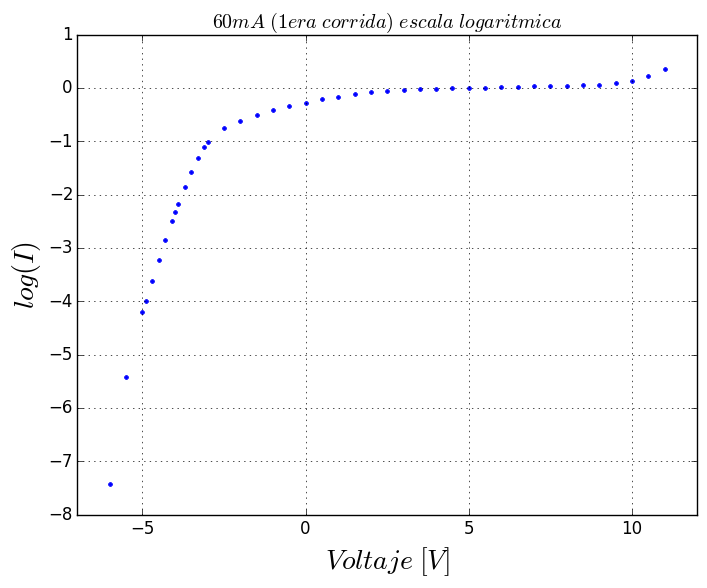

In [26]:
V1=zeros(43) #1era corrida 
I1=zeros(43)
for i in 1:43
    V1[i]=sixtymA[i,1]
    I1[i]=sixtymA[i,2]
end 
plot(V1,log(I1),"b.")
title(L"60mA \ (1era \ corrida) \ escala \ logaritmica")
xlabel(L"Voltaje \ [V]",size=20)
ylabel(L"log(I)",size=20);
axis([-7,12,-8,1])
grid("on")

In [27]:
model(x,p)=p[1]x+p[2] #queremos ajustar una recta en la grafica semilog
m=12 #numero de puntos con los que se sjusta la recta en la region C
x1=zeros(m)
y1=zeros(m)
for i in 1:m #PARA HACER UN MEJOR AJUSTE HAY QUE JUGAR CON LOS PUNTOS DE LA RECTA QUE SE ESCOGEn CON LOS INDICES 
    x1[i]=V1[i+1] #DE DONDE A DONDE CORRE LA i
    y1[i]=I1[i+1]
end 
fit1=curve_fit(model,x1,log(y1),[0.5,0.5])
p1=fit1.param

n=20 #numero de puntos con los que se ajusta la curva en la región E

x2=zeros(n)
y2=zeros(n)
for i in 1:n
    x2[i]=V1[i+20]
    y2[i]=I1[i+20]
end 

fit2=curve_fit(model,x2,log((y2)),[0.5,0.5])
p2=fit2.param

x1=linspace(-6,-2,30)
y1=(p1[1]x1+p1[2])
x2=linspace(-6,12,30)
y2=(p2[1]x2+p2[2])
errors1 = estimate_errors(fit1, 0.95)
errors2=estimate_errors(fit2,0.95)
println(p1),println(p2)

println(errors1),println(errors2);


[1.8334150645440088,4.931294655436996]
[0.029338715585071385,-0.17030744667505285]
[0.10757386063935738,0.46574636854803453]
[0.005163066458872219,0.02868872175807778]


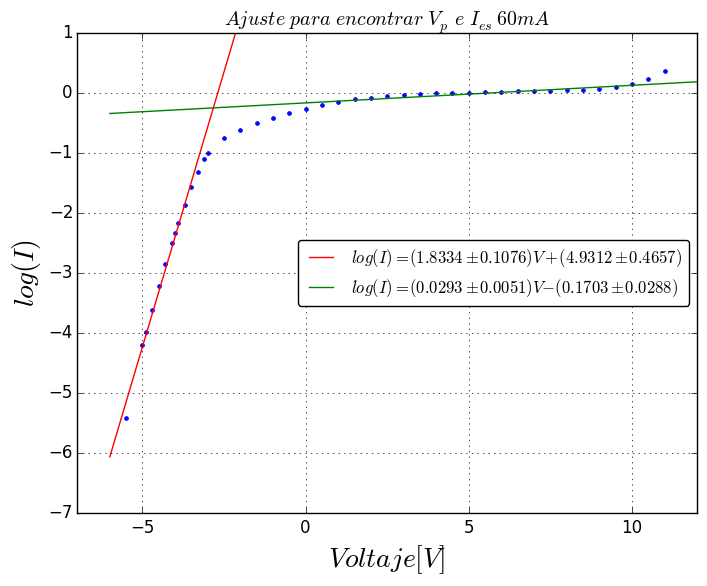

In [28]:
plot(V1,log(I1),"b.")
plot(x1,y1,"r",label=L"log(I)=(1.8334 \pm 0.1076)V+(4.9312 \pm 0.4657)")
plot(x2,y2,"g",label=L"log(I)=(0.0293 \pm 0.0051)V-(0.1703 \pm 0.0288)")
title(L"Ajuste \ para \ encontrar \ V_p \ e  \ I_{es} \ 60mA")
legend(loc="center right",fancybox="true",fontsize="medium")
xlabel(L"Voltaje[V]",size=20)
ylabel(L"log(I)",size=20)
axis([-7,12,-7,1])
grid("on")  

In [29]:
#determinar la intersección de las rectas para intersección de las rectas

Vp=(p2[2]-p1[2])/(p1[1]-p2[1]) 
logVp=model(Vp,p1) #evaluamos cualquiera de las dos rectas definidas por la función model, y encontramos el logaritmo 
                    #de Vp que es el punto que aparece en la grafica anterior 
Ip=exp(logVp)
println(logVp)
println("El voltaje flotante es ",Vp," V"),println("La corriente de saturación de electrones es ",Ip,"mA");

#Incertidumbres
a=-(p2[2]-p1[2])/((p1[1]-p2[1])^2)
b=-1/(p1[1]-p2[1])
c=(p2[2]-p1[2])/((p1[1]-p2[1])^2)
d=-b
suma=a^2*(errors1[1]^2)+b^2*(errors1[2]^2)+c^2*(errors2[1]^2)+b^2*(errors2[2]^2)
dVp=sqrt(suma)

f=exp(logVp)*(Vp+a)
g=exp(logVp)*(p1[1]*b+1)
h=exp(logVp)*(p1[1]*c)
j=exp(logVp)*p1[1]*d
suma=f^2*(errors1[1]^2)+g^2*(errors1[2]^2)+h^2*(errors2[1]^2)+j^2*(errors2[2]^2)
dIp=sqrt(suma)

println("La incertidumbre de Vp es ",dVp," V")
println("La incertidumbre en la corriente de saturación de electrones Ies resulta en ", dIp," mA")

-0.25327203583362046
El voltaje flotante es -2.827819401909451 V
La corriente de saturación de electrones es 0.7762566834642898mA
La incertidumbre de Vp es 0.3088667296904008 V
La incertidumbre en la corriente de saturación de electrones Ies resulta en 0.10842593777038848 mA


In [30]:
#1 TEMPERATURAS
Vf=-6.25
T1=(2*e/k)*(Vp-Vf)/log(2M/(π*me))
a=(2*e/k)/log(2M/(π*me))
b=(-2*e/k)/log(2M/(π*me))
dT1=sqrt(a^2*dVp^2+b^2*0.05^2)
#2
T2=(e/k)*(Vf-Vp)/log(0.6*sqrt(2*π*me/M))
a=(e/k)/log(0.6*sqrt(2*π*me/M))
b=-a
dT2=sqrt(a^2*0.05^2+b^2*dVp^2)
#3
Ie2=exp(model(-5,p1))
Ie1=exp(model(-4,p1))
T3=(-5+4)/log(Ie2/Ie1) #le falta un factor de e/k

a=1/log(Ie2/Ie1)
b=-a
c=(-5+4)/(Ie1*(log(Ie2/Ie1)^2))
d=(-4+5)*(Ie2/Ie1^2)/(log(Ie2/Ie1)^2)
dT3=sqrt(a^2*0.05^2+b^2*0.05+c^2*0.05^2^2+d^2*0.05^2)
println("T1= ",T1," +/- ",dT1," Kelvin")
println("T2= ",T2," +/- ",dT2," Kelvin")
println("T3= ",T3," +/- ",dT3,"en electron Volts")
println("T3= ",(e/k)*T3," +/- ",(e/k)*dT3," Kelvin")
println("Por otro aldo el inverso de la pendiente ajustada da una tempreatura de ", (e/k)*1/p1[1]," +/- ", (e/k)*sqrt((1/p1[1]^4)*errors1[1]^2))
Te=(T1+T2+(e/k)*T3)/3
dTe=sqrt((dT1)^2+(dT2)^2+(dT3)^2)
Tp601=Te
dTp601=dTe
println("El promedio de estas temperaturas es ",Te, " +/- ",dTe," Kelvin")
#faltan las incertidumbres de estas mediciones y la densidad de electrones.

T1= 7392.377615023786 +/- 675.8799836717171 Kelvin
T2= 7652.077305875991 +/- 699.6241471808987 Kelvin
T3= 0.5454302298147151 +/- 0.12797008221994366en electron Volts
T3= 6329.455630220377 +/- 1485.0312893033833 Kelvin
Por otro aldo el inverso de la pendiente ajustada da una tempreatura de 6329.455630220381 +/- 371.3747045367857
El promedio de estas temperaturas es 7124.636850373386 +/- 972.7732089356812 Kelvin


In [31]:
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Te))
Ne=sq*(4*Ip*0.001)/(e*A) #Densidad de electrones multiplique por el factor 0.001 por que la corriente está en mA
a=sq*4/(e*A)
b=4*Ip*0.001/(2*(sq)*e*A)
c=a*(1/A)
dNe=sqrt(a^2*(dIp*0.001)^2+b^2*dTe+c^2*dA^2) #INCERTIDUMBRE HORRIBLE!!!!

println("La densidad de electrones es ",Ne," +/- ",dNe)

La densidad de electrones es 4.5928814987126364e18 +/- 1.9695098368206635e31


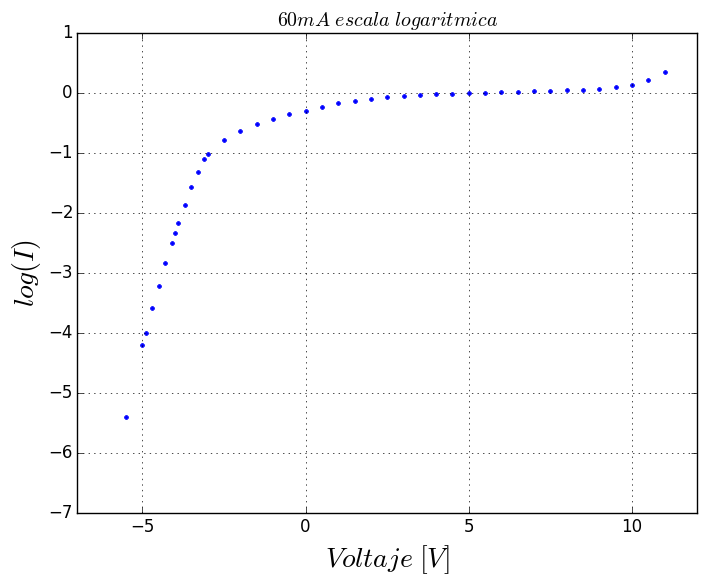

In [32]:
V2=zeros(43) #2da corrida
I2=zeros(43)
for i in 1:43
    V2[i]=sixtymA[i,1]
    I2[i]=sixtymA[i,3]
end 
plot(V2,log(I2),"b.")
title(L"60mA \ escala \ logaritmica")
xlabel(L"Voltaje \ [V]",size=20)
ylabel(L"log(I)",size=20);
axis([-7,12,-7,1])
grid("on")

In [33]:
model(x,p)=p[1]x+p[2] #queremos ajustar una recta en la grafica semilog
m=13 #numero de puntos con los que se sjusta la recta en la region C
x1=zeros(m)
y1=zeros(m)
for i in 1:m #PARA HACER UN MEJOR AJUSTE HAY QUE JUGAR CON LOS PUNTOS DE LA RECTA QUE SE ESCOGEn CON LOS INDICES 
    x1[i]=V2[i+1] #DE DONDE A DONDE CORRE LA i
    y1[i]=I2[i+1]
end 
fit1=curve_fit(model,x1,log(y1),[0.5,0.5])
p1=fit1.param

n=19 #numero de puntos con los que se ajusta la curva en la región E
x2=zeros(n)
y2=zeros(n)
for i in 1:n
    x2[i]=V2[i+21]
    y2[i]=I2[i+21]
end 

fit2=curve_fit(model,x2,log((y2)),[0.5,0.5])
p2=fit2.param

x1=linspace(-6,-2,30)
y1=(p1[1]x1+p1[2])
x2=linspace(-6,12,30)
y2=(p2[1]x2+p2[2])
errors1 = estimate_errors(fit1, 0.95)
errors2=estimate_errors(fit2,0.95)
println(p1),println(p2)

println(errors1),println(errors2);


[1.7609863219649162,4.6020938600381776]
[0.02796295711960021,-0.1675051846660139]
[0.10954306596594024,0.4652977308472973]
[0.004318471505522709,0.02461907542292754]


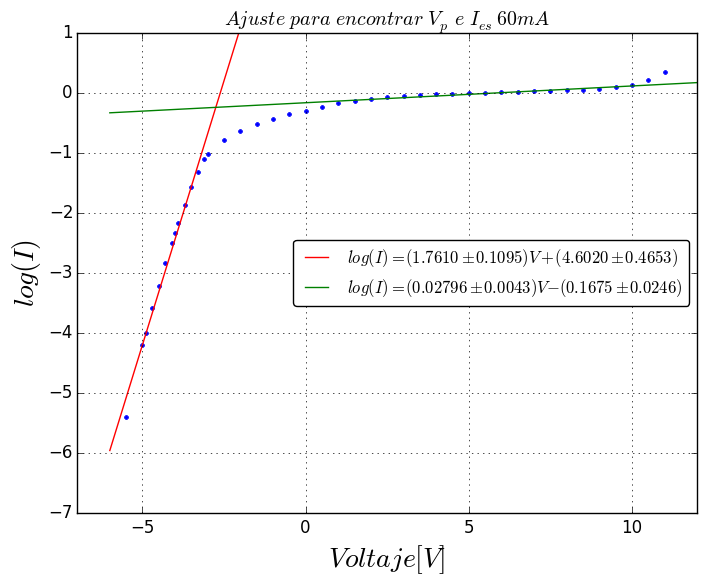

In [34]:
plot(V2,log(I2),"b.")
plot(x1,y1,"r",label=L"log(I)=(1.7610 \pm 0.1095)V+(4.6020 \pm 0.4653)")
plot(x2,y2,"g",label=L"log(I)=(0.02796 \pm 0.0043)V-(0.1675 \pm 0.0246)")
title(L"Ajuste \ para \ encontrar \ V_p \ e  \ I_{es} \ 60mA")
legend(loc="center right",fancybox="true",fontsize="medium")
xlabel(L"Voltaje[V]",size=20)
ylabel(L"log(I)",size=20)
axis([-7,12,-7,1])
grid("on")  #QUIZAS PUEDA AJUSTAR MEJOR LA RECTA AZUL

In [35]:
#determinar la intersección de las rectas para intersección de las rectas

Vp=(p2[2]-p1[2])/(p1[1]-p2[1]) 
logVp=model(Vp,p1) #evaluamos cualquiera de las dos rectas definidas por la función model, y encontramos el logaritmo 
                    #de Vp que es el punto que aparece en la grafica anterior 
Ip=exp(logVp)
println(logVp)
println("El voltaje flotante es ",Vp," V"),println("La corriente de saturación de electrones es ",Ip,"mA");

#Incertidumbres
a=-(p2[2]-p1[2])/((p1[1]-p2[1])^2)
b=-1/(p1[1]-p2[1])
c=(p2[2]-p1[2])/((p1[1]-p2[1])^2)
d=-b
suma=a^2*(errors1[1]^2)+b^2*(errors1[2]^2)+c^2*(errors2[1]^2)+b^2*(errors2[2]^2)
dVp=sqrt(suma)

f=exp(logVp)*(Vp+a)
g=exp(logVp)*(p1[1]*b+1)
h=exp(logVp)*(p1[1]*c)
j=exp(logVp)*p1[1]*d
suma=f^2*(errors1[1]^2)+g^2*(errors1[2]^2)+h^2*(errors2[1]^2)+j^2*(errors2[2]^2)
dIp=sqrt(suma)

println("La incertidumbre de Vp es ",dVp," V")
println("La incertidumbre en la corriente de saturación de electrones Ies resulta en ", dIp," mA")

-0.2444643857190565
El voltaje flotante es -2.7521839240349255 V
La corriente de saturación de electrones es 0.7831238782625365mA
La incertidumbre de Vp es 0.32030994268768714 V
La incertidumbre en la corriente de saturación de electrones Ies resulta en 0.10237437611401992 mA


In [36]:
#1 TEMPERATURAS
Vf=-6.25
T1=(2*e/k)*(Vp-Vf)/log(2M/(π*me))
a=(2*e/k)/log(2M/(π*me))
b=(-2*e/k)/log(2M/(π*me))
dT1=sqrt(a^2*dVp^2+b^2*0.05^2)
#2
T2=(e/k)*(Vf-Vp)/log(0.6*sqrt(2*π*me/M))
a=(e/k)/log(0.6*sqrt(2*π*me/M))
b=-a
dT2=sqrt(a^2*0.05^2+b^2*dVp^2)
#3
Ie2=exp(model(-5,p1))
Ie1=exp(model(-4,p1))
T3=(-5+4)/log(Ie2/Ie1) #le falta un factor de e/k

a=1/log(Ie2/Ie1)
b=-a
c=(-5+4)/(Ie1*(log(Ie2/Ie1)^2))
d=(-4+5)*(Ie2/Ie1^2)/(log(Ie2/Ie1)^2)
dT3=sqrt(a^2*0.05^2+b^2*0.05+c^2*0.05^2^2+d^2*0.05^2)
println("T1= ",T1," +/- ",dT1," Kelvin")
println("T2= ",T2," +/- ",dT2," Kelvin")
println("T3= ",T3," +/- ",dT3,"en electron Volts")
println("T3= ",(e/k)*T3," +/- ",(e/k)*dT3," Kelvin")
println("Por otro aldo el inverso de la pendiente ajustada da una tempreatura de ", (e/k)*1/p1[1]," +/- ", (e/k)*sqrt((1/p1[1]^4)*errors1[1]^2))
Te=(T1+T2+(e/k)*T3)/3
dTe=sqrt((dT1)^2+(dT2)^2+(dT3)^2)
Tp602=Te
dTp602=dTe
println("El promedio de estas temperaturas es ",Te, " +/- ",dTe," Kelvin")
#faltan las incertidumbres de estas mediciones y la densidad de electrones.

T1= 7555.760580216575 +/- 700.292368226924 Kelvin
T2= 7821.200035426172 +/- 724.8941568537766 Kelvin
T3= 0.5678635816342942 +/- 0.13427628862581772en electron Volts
T3= 6589.783894437387 +/- 1558.2117832678462 Kelvin
Por otro aldo el inverso de la pendiente ajustada da una tempreatura de 6589.783894437389 +/- 409.9209192290519
El promedio de estas temperaturas es 7322.248170026712 +/- 1007.909201102829 Kelvin


In [37]:
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Te))
Ne=sq*(4*Ip*0.001)/(e*A) #Densidad de electrones multiplique por el factor 0.001 por que la corriente está en mA
a=sq*4/(e*A)
b=4*Ip*0.001/(2*(sq)*e*A)
c=a*(1/A)
dNe=sqrt(a^2*(dIp*0.001)^2+b^2*dTe+c^2*dA^2) #INCERTIDUMBRE HORRIBLE!!!!

println("La densidad de electrones es ",Ne," +/- ",dNe)

La densidad de electrones es 4.570560883625571e18 +/- 2.0503548415585063e31


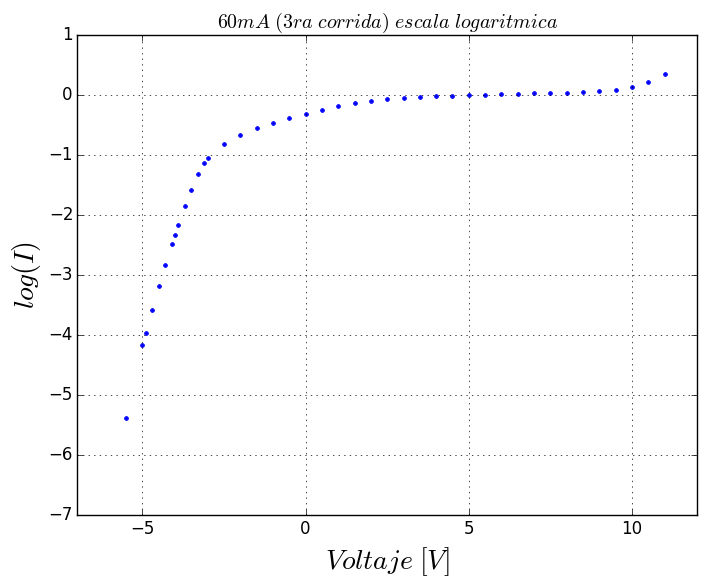

In [38]:
V3=zeros(43) #3ra corrida
I3=zeros(43)
for i in 1:43
    V3[i]=sixtymA[i,1]
    I3[i]=sixtymA[i,4]
end 
plot(V3,log(I3),"b.")
title(L"60mA  \ (3ra \ corrida) \ escala \ logaritmica")
xlabel(L"Voltaje \ [V]",size=20)
ylabel(L"log(I)",size=20);
axis([-7,12,-7,1])
grid("on")

In [39]:
model(x,p)=p[1]x+p[2] #queremos ajustar una recta en la grafica semilog
m=13 #numero de puntos con los que se sjusta la recta en la region C
x1=zeros(m)
y1=zeros(m)
for i in 1:m #PARA HACER UN MEJOR AJUSTE HAY QUE JUGAR CON LOS PUNTOS DE LA RECTA QUE SE ESCOGEn CON LOS INDICES 
    x1[i]=V3[i+1] #DE DONDE A DONDE CORRE LA i
    y1[i]=I3[i+1]
end 
fit1=curve_fit(model,x1,log(y1),[0.5,0.5])
p1=fit1.param

n=19 #numero de puntos con los que se ajusta la curva en la región E
x2=zeros(n)
y2=zeros(n)
for i in 1:n
    x2[i]=V3[i+21]
    y2[i]=I3[i+21]
end 

fit2=curve_fit(model,x2,log((y2)),[0.5,0.5])
p2=fit2.param

x1=linspace(-6,-2,30)
y1=(p1[1]x1+p1[2])
x2=linspace(-6,12,30)
y2=(p2[1]x2+p2[2])
errors1 = estimate_errors(fit1, 0.95)
errors2=estimate_errors(fit2,0.95)
println(p1),println(p2)

println(errors1),println(errors2);

[1.7452368845906208,4.542677419246349]
[0.029377404902701094,-0.18010252697860932]
[0.11221672851221547,0.47665444343125896]
[0.004883223521773774,0.027838657273946736]


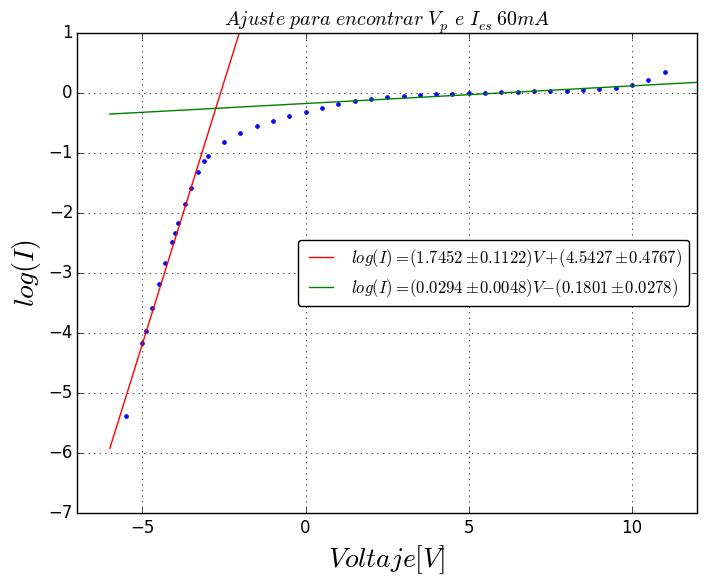

In [40]:
plot(V3,log(I3),"b.")
plot(x1,y1,"r",label=L"log(I)=(1.7452 \pm 0.1122)V+(4.5427 \pm 0.4767)")
plot(x2,y2,"g",label=L"log(I)=(0.0294 \pm 0.0048)V-(0.1801 \pm 0.0278)")
title(L"Ajuste \ para \ encontrar \ V_p \ e  \ I_{es} \ 60mA")
legend(loc="center right",fancybox="true",fontsize="medium")
xlabel(L"Voltaje[V]",size=20)
ylabel(L"log(I)",size=20)
axis([-7,12,-7,1])
grid("on")  

In [41]:
#determinar la intersección de las rectas para intersección de las rectas

Vp=(p2[2]-p1[2])/(p1[1]-p2[1]) 
logVp=model(Vp,p1) #evaluamos cualquiera de las dos rectas definidas por la función model, y encontramos el logaritmo 
                    #de Vp que es el punto que aparece en la grafica anterior 
Ip=exp(logVp)
println(logVp)
println("El voltaje flotante es ",Vp," V"),println("La corriente de saturación de electrones es ",Ip,"mA");

#Incertidumbres
a=-(p2[2]-p1[2])/((p1[1]-p2[1])^2)
b=-1/(p1[1]-p2[1])
c=(p2[2]-p1[2])/((p1[1]-p2[1])^2)
d=-b
suma=a^2*(errors1[1]^2)+b^2*(errors1[2]^2)+c^2*(errors2[1]^2)+b^2*(errors2[2]^2)
dVp=sqrt(suma)

f=exp(logVp)*(Vp+a)
g=exp(logVp)*(p1[1]*b+1)
h=exp(logVp)*(p1[1]*c)
j=exp(logVp)*p1[1]*d
suma=f^2*(errors1[1]^2)+g^2*(errors1[2]^2)+h^2*(errors2[1]^2)+j^2*(errors2[2]^2)
dIp=sqrt(suma)

println("La incertidumbre de Vp es ",dVp," V")
println("La incertidumbre en la corriente de saturación de electrones Ies resulta en ", dIp," mA")

-0.26096172342740154
El voltaje flotante es -2.752428157510857 V
La corriente de saturación de electrones es 0.770310403892895mA
La incertidumbre de Vp es 0.33150664139198976 V
La incertidumbre en la corriente de saturación de electrones Ies resulta en 0.10236803152423088 mA


In [42]:
#1 TEMPERATURAS
Vf=-6.25
T1=(2*e/k)*(Vp-Vf)/log(2M/(π*me))
a=(2*e/k)/log(2M/(π*me))
b=(-2*e/k)/log(2M/(π*me))
dT1=sqrt(a^2*dVp^2+b^2*0.05^2)
#2
T2=(e/k)*(Vf-Vp)/log(0.6*sqrt(2*π*me/M))
a=(e/k)/log(0.6*sqrt(2*π*me/M))
b=-a
dT2=sqrt(a^2*0.05^2+b^2*dVp^2)
#3
Ie2=exp(model(-5,p1))
Ie1=exp(model(-4,p1))
T3=(-5+4)/log(Ie2/Ie1) #le falta un factor de e/k

a=1/log(Ie2/Ie1)
b=-a
c=(-5+4)/(Ie1*(log(Ie2/Ie1)^2))
d=(-4+5)*(Ie2/Ie1^2)/(log(Ie2/Ie1)^2)
dT3=sqrt(a^2*0.05^2+b^2*0.05+c^2*0.05^2^2+d^2*0.05^2)
println("T1= ",T1," +/- ",dT1," Kelvin")
println("T2= ",T2," +/- ",dT2," Kelvin")
println("T3= ",T3," +/- ",dT3,"en electron Volts")
println("T3= ",(e/k)*T3," +/- ",(e/k)*dT3," Kelvin")
println("Por otro aldo el inverso de la pendiente ajustada da una tempreatura de ", (e/k)*1/p1[1]," +/- ", (e/k)*sqrt((1/p1[1]^4)*errors1[1]^2))
Te=(T1+T2+(e/k)*T3)/3
dTe=sqrt((dT1)^2+(dT2)^2+(dT3)^2)
Tp603=Te
dTp603=dTe
println("El promedio de estas temperaturas es ",Te, " +/- ",dTe," Kelvin")
#faltan las incertidumbres de estas mediciones y la densidad de electrones.

T1= 7555.233002542469 +/- 724.1989794571721 Kelvin
T2= 7820.653923558331 +/- 749.640625010868 Kelvin
T3= 0.5729881191655937 +/- 0.1356561626607831en electron Volts
T3= 6649.251689137321 +/- 1574.2245581420468 Kelvin
Por otro aldo el inverso de la pendiente ajustada da una tempreatura de 6649.251689137321 +/- 427.5392516611512
El promedio de estas temperaturas es 7341.71287174604 +/- 1042.317248689711 Kelvin


In [43]:
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Te))
Ne=sq*(4*Ip*0.001)/(e*A) #Densidad de electrones multiplique por el factor 0.001 por que la corriente está en mA
a=sq*4/(e*A)
b=4*Ip*0.001/(2*(sq)*e*A)
c=a*(1/A)
dNe=sqrt(a^2*(dIp*0.001)^2+b^2*dTe+c^2*dA^2) #INCERTIDUMBRE HORRIBLE!!!!

println("La densidad de electrones es ",Ne," +/- ",dNe)

La densidad de electrones es 4.489813692024461e18 +/- 2.0536671604427855e31


In [44]:
Tp=(Tp601+Tp602+Tp603)/3
dTp=min(dTp601,dTp602,dTp603)
println(Tp)
println(dTp)
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Tp))
Ne=sq*(4*Ip*0.001)/(e*A)

7262.865964048712
972.7732089356812


4.5141189948545044e18

#-) 50mA

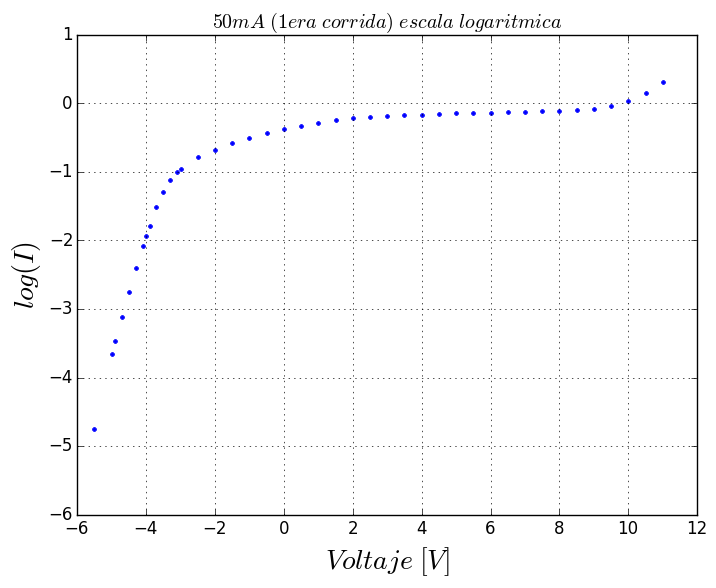

In [45]:
V1=zeros(43) #1era corrida 
I1=zeros(43)
for i in 1:43
    V1[i]=fiftymA[i,1]
    I1[i]=fiftymA[i,2]
end 
plot(V1,log(I1),"b.")
title(L"50mA \ (1era \ corrida) \ escala \ logaritmica")
xlabel(L"Voltaje \ [V]",size=20)
ylabel(L"log(I)",size=20);
axis([-6,12,-6,1])
grid("on")

In [46]:
model(x,p)=p[1]x+p[2] #queremos ajustar una recta en la grafica semilog
m=12 #numero de puntos con los que se sjusta la recta en la region C
x1=zeros(m)
y1=zeros(m)
for i in 1:m #PARA HACER UN MEJOR AJUSTE HAY QUE JUGAR CON LOS PUNTOS DE LA RECTA QUE SE ESCOGEn CON LOS INDICES 
    x1[i]=V1[i+1] #DE DONDE A DONDE CORRE LA i
    y1[i]=I1[i+1]
end 
fit1=curve_fit(model,x1,log(y1),[0.5,0.5])
p1=fit1.param

n=20 #numero de puntos con los que se ajusta la curva en la región E

x2=zeros(n)
y2=zeros(n)
for i in 1:n
    x2[i]=V1[i+20]
    y2[i]=I1[i+20]
end 

fit2=curve_fit(model,x2,log((y2)),[0.5,0.5])
p2=fit2.param

x1=linspace(-6,-2,30)
y1=(p1[1]x1+p1[2])
x2=linspace(-6,12,30)
y2=(p2[1]x2+p2[2])
errors1 = estimate_errors(fit1, 0.988)
errors2=estimate_errors(fit2,0.95)
println(p1),println(p2)

println(errors1),println(errors2);


[1.645706932540286,4.558993357710195]
[0.026397576387178146,-0.29827114999776816]
[0.1684564230784568,0.729340444241116]
[0.004035582034472403,0.022423823330891376]


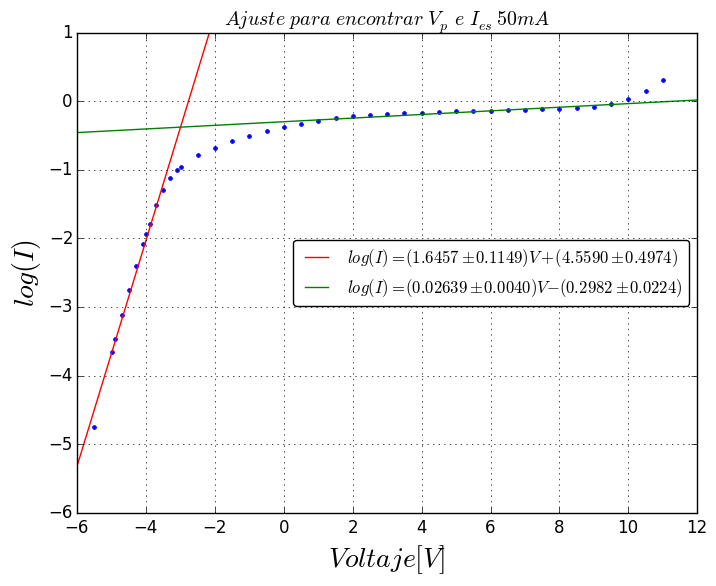

In [47]:
plot(V1,log(I1),"b.")
plot(x1,y1,"r",label=L"log(I)=(1.6457 \pm 0.1149)V+(4.5590 \pm 0.4974)")
plot(x2,y2,"g",label=L"log(I)=(0.02639 \pm 0.0040)V-(0.2982 \pm 0.0224)")
title(L"Ajuste \ para \ encontrar \ V_p \ e  \ I_{es} \ 50mA")
legend(loc="center right",fancybox="true",fontsize="medium")
xlabel(L"Voltaje[V]",size=20)
ylabel(L"log(I)",size=20)
axis([-6,12,-6,1])
grid("on")  

In [48]:
#determinar la intersección de las rectas para intersección de las rectas

Vp=(p2[2]-p1[2])/(p1[1]-p2[1]) 
logVp=model(Vp,p1) #evaluamos cualquiera de las dos rectas definidas por la función model, y encontramos el logaritmo 
                    #de Vp que es el punto que aparece en la grafica anterior 
Ip=exp(logVp)
println(logVp)
println("El voltaje de plasma es ",Vp," V"),println("La corriente de saturación de electrones es ",Ip,"mA");

#Incertidumbres
a=-(p2[2]-p1[2])/((p1[1]-p2[1])^2)
b=-1/(p1[1]-p2[1])
c=(p2[2]-p1[2])/((p1[1]-p2[1])^2)
d=-b
suma=a^2*(errors1[1]^2)+b^2*(errors1[2]^2)+c^2*(errors2[1]^2)+b^2*(errors2[2]^2)
dVp=sqrt(suma)

f=exp(logVp)*(Vp+a)
g=exp(logVp)*(p1[1]*b+1)
h=exp(logVp)*(p1[1]*c)
j=exp(logVp)*p1[1]*d
suma=f^2*(errors1[1]^2)+g^2*(errors1[2]^2)+h^2*(errors2[1]^2)+j^2*(errors2[2]^2)
dIp=sqrt(suma)

println("La incertidumbre de Vp es ",dVp," V")
println("La incertidumbre en la corriente de saturación de electrones Ies resulta en ", dIp," mA")

-0.37745306195778827
El voltaje de plasma es -2.999590219899096 V
La corriente de saturación de electrones es 0.6856053818034007mA
La incertidumbre de Vp es 0.5481632392658571 V
La incertidumbre en la corriente de saturación de electrones Ies resulta en 0.1339283616671855 mA


In [49]:
#1 TEMPERATURAS
Vf=-6.25
T1=(2*e/k)*(Vp-Vf)/log(2M/(π*me))
a=(2*e/k)/log(2M/(π*me))
b=(-2*e/k)/log(2M/(π*me))
dT1=sqrt(a^2*dVp^2+b^2*0.05^2)
#2
T2=(e/k)*(Vf-Vp)/log(0.6*sqrt(2*π*me/M))
a=(e/k)/log(0.6*sqrt(2*π*me/M))
b=-a
dT2=sqrt(a^2*0.05^2+b^2*dVp^2)
#3
Ie2=exp(model(-5,p1))
Ie1=exp(model(-4,p1))
T3=(-5+4)/log(Ie2/Ie1) #le falta un factor de e/k

a=1/log(Ie2/Ie1)
b=-a
c=(-5+4)/(Ie1*(log(Ie2/Ie1)^2))
d=(-4+5)*(Ie2/Ie1^2)/(log(Ie2/Ie1)^2)
dT3=sqrt(a^2*0.05^2+b^2*0.05+c^2*0.05^2^2+d^2*0.05^2)
println("T1= ",T1," +/- ",dT1," Kelvin")
println("T2= ",T2," +/- ",dT2," Kelvin")
println("T3= ",T3," +/- ",dT3,"en electron Volts")
println("T3= ",(e/k)*T3," +/- ",(e/k)*dT3," Kelvin")
println("Por otro aldo el inverso de la pendiente ajustada da una tempreatura de ", (e/k)*1/p1[1]," +/- ", (e/k)*sqrt((1/p1[1]^4)*errors1[1]^2))
Te=(T1+T2+(e/k)*T3)/3
dTe=sqrt((dT1)^2+(dT2)^2+(dT3)^2)
Tp501=Te
dTp501=dTe
println("El promedio de estas temperaturas es ",Te, " +/- ",dTe," Kelvin")
#faltan las incertidumbres de estas mediciones y la densidad de electrones.

T1= 7021.329181598188 +/- 1189.023132751365 Kelvin
T2= 7267.993666665453 +/- 1230.79439445803 Kelvin
T3= 0.6076416038768317 +/- 0.1419835563086983en electron Volts
T3= 7051.388721378477 +/- 1647.6509198657495 Kelvin
Por otro aldo el inverso de la pendiente ajustada da una tempreatura de 7051.388721378476 +/- 721.7881253654577
El promedio de estas temperaturas es 7113.570523214039 +/- 1711.3243035165804 Kelvin


In [50]:
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Te))
Ne=sq*(4*Ip*0.001)/(e*A) #Densidad de electrones multiplique por el factor 0.001 por que la corriente está en mA
a=sq*4/(e*A)
b=4*Ip*0.001/(2*(sq)*e*A)
c=a*(1/A)
dNe=sqrt(a^2*(dIp*0.001)^2+b^2*dTe+c^2*dA^2) #INCERTIDUMBRE HORRIBLE!!!!

println("La densidad de electrones es ",Ne," +/- ",dNe)

La densidad de electrones es 4.059678592987058e18 +/- 2.3054188116012665e31


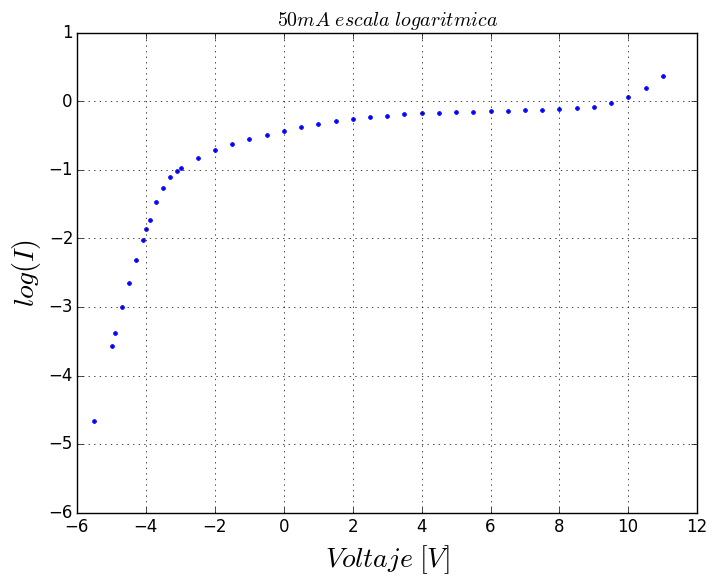

In [51]:
V2=zeros(43) #2da corrida
I2=zeros(43)
for i in 1:43
    V2[i]=fiftymA[i,1]
    I2[i]=fiftymA[i,3]
end 
plot(V2,log(I2),"b.")
title(L"50mA \ escala \ logaritmica")
xlabel(L"Voltaje \ [V]",size=20)
ylabel(L"log(I)",size=20);
axis([-6,12,-6,1])
grid("on")

In [52]:
model(x,p)=p[1]x+p[2] #queremos ajustar una recta en la grafica semilog
m=12 #numero de puntos con los que se sjusta la recta en la region C
x1=zeros(m)
y1=zeros(m)
for i in 1:m #PARA HACER UN MEJOR AJUSTE HAY QUE JUGAR CON LOS PUNTOS DE LA RECTA QUE SE ESCOGEn CON LOS INDICES 
    x1[i]=V2[i] #DE DONDE A DONDE CORRE LA i
    y1[i]=I2[i]
end 
fit1=curve_fit(model,x1,log(y1),[0.5,0.5])
p1=fit1.param

n=20 #numero de puntos con los que se ajusta la curva en la región E
x2=zeros(n)
y2=zeros(n)
for i in 1:n
    x2[i]=V2[i+20]
    y2[i]=I2[i+20]
end 

fit2=curve_fit(model,x2,log((y2)),[0.5,0.5])
p2=fit2.param

x1=linspace(-6,-2,30)
y1=(p1[1]x1+p1[2])
x2=linspace(-6,12,30)
y2=(p2[1]x2+p2[2])
errors1 = estimate_errors(fit1, 0.95)
errors2=estimate_errors(fit2,0.95)
println(p1),println(p2)

println(errors1),println(errors2);


[1.8666131073000922,5.584038115424268]
[0.032214987149428935,-0.34449653986926776]
[0.15286183509034018,0.6977853952372944]
[0.0046780129432881816,0.02599350846638906]


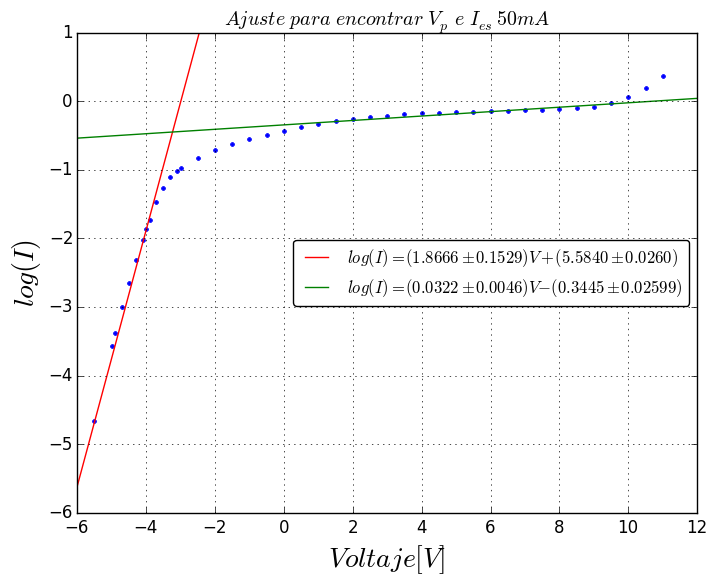

In [53]:
plot(V2,log(I2),"b.")
plot(x1,y1,"r",label=L"log(I)=(1.8666 \pm 0.1529)V+(5.5840 \pm 0.0260)")
plot(x2,y2,"g",label=L"log(I)=(0.0322 \pm 0.0046)V-(0.3445 \pm 0.02599)")
title(L"Ajuste \ para \ encontrar \ V_p \ e  \ I_{es} \ 50mA")
legend(loc="center right",fancybox="true",fontsize="medium")
xlabel(L"Voltaje[V]",size=20)
ylabel(L"log(I)",size=20)
axis([-6,12,-6,1])
grid("on")  #QUIZAS PUEDA AJUSTAR MEJOR LA RECTA AZUL

In [54]:
#determinar la intersección de las rectas para intersección de las rectas

Vp=(p2[2]-p1[2])/(p1[1]-p2[1]) 
logVp=model(Vp,p1) #evaluamos cualquiera de las dos rectas definidas por la función model, y encontramos el logaritmo 
                    #de Vp que es el punto que aparece en la grafica anterior 
Ip=exp(logVp)
println(logVp)
println("El voltaje flotante es ",Vp," V"),println("La corriente de saturación de electrones es ",Ip,"mA");

#Incertidumbres
a=-(p2[2]-p1[2])/((p1[1]-p2[1])^2)
b=-1/(p1[1]-p2[1])
c=(p2[2]-p1[2])/((p1[1]-p2[1])^2)
d=-b
suma=a^2*(errors1[1]^2)+b^2*(errors1[2]^2)+c^2*(errors2[1]^2)+b^2*(errors2[2]^2)
dVp=sqrt(suma)

f=exp(logVp)*(Vp+a)
g=exp(logVp)*(p1[1]*b+1)
h=exp(logVp)*(p1[1]*c)
j=exp(logVp)*p1[1]*d
suma=f^2*(errors1[1]^2)+g^2*(errors1[2]^2)+h^2*(errors2[1]^2)+j^2*(errors2[2]^2)
dIp=sqrt(suma)

println("La incertidumbre de Vp es ",dVp," V")
println("La incertidumbre en la corriente de saturación de electrones Ies resulta en ", dIp," mA")

-0.4486111623371203
El voltaje flotante es -3.2318691292632873 V
La corriente de saturación de electrones es 0.6385143288493694mA
La incertidumbre de Vp es 0.46636344354908427 V
La incertidumbre en la corriente de saturación de electrones Ies resulta en 0.1450192262363371 mA


In [55]:
#1 TEMPERATURAS
Vf=-6.25
T1=(2*e/k)*(Vp-Vf)/log(2M/(π*me))
a=(2*e/k)/log(2M/(π*me))
b=(-2*e/k)/log(2M/(π*me))
dT1=sqrt(a^2*dVp^2+b^2*0.05^2)
#2
T2=(e/k)*(Vf-Vp)/log(0.6*sqrt(2*π*me/M))
a=(e/k)/log(0.6*sqrt(2*π*me/M))
b=-a
dT2=sqrt(a^2*0.05^2+b^2*dVp^2)
#3
Ie2=exp(model(-5,p1))
Ie1=exp(model(-4,p1))
T3=(-5+4)/log(Ie2/Ie1) #le falta un factor de e/k

a=1/log(Ie2/Ie1)
b=-a
c=(-5+4)/(Ie1*(log(Ie2/Ie1)^2))
d=(-4+5)*(Ie2/Ie1^2)/(log(Ie2/Ie1)^2)
dT3=sqrt(a^2*0.05^2+b^2*0.05+c^2*0.05^2^2+d^2*0.05^2)
println("T1= ",T1," +/- ",dT1," Kelvin")
println("T2= ",T2," +/- ",dT2," Kelvin")
println("T3= ",T3," +/- ",dT3,"en electron Volts")
println("T3= ",(e/k)*T3," +/- ",(e/k)*dT3," Kelvin")
println("Por otro aldo el inverso de la pendiente ajustada da una tempreatura de ", (e/k)*1/p1[1]," +/- ", (e/k)*sqrt((1/p1[1]^4)*errors1[1]^2))
Te=(T1+T2+(e/k)*T3)/3
dTe=sqrt((dT1)^2+(dT2)^2+(dT3)^2)
Tp502=Te
dTp502=dTe
println("El promedio de estas temperaturas es ",Te, " +/- ",dTe," Kelvin")
#faltan las incertidumbres de estas mediciones y la densidad de electrones.

T1= 6519.575004456261 +/- 1013.1820498932611 Kelvin
T2= 6748.612494330161 +/- 1048.7758843585798 Kelvin
T3= 0.5357296571470135 +/- 0.12370363938592006en electron Volts
T3= 6216.885147449733 +/- 1435.5212710816256 Kelvin
Por otro aldo el inverso de la pendiente ajustada da una tempreatura de 6216.885147449734 +/- 509.1170036621115
El promedio de estas temperaturas es 6495.024215412052 +/- 1458.2416593763267 Kelvin


In [56]:
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Te))
Ne=sq*(4*Ip*0.001)/(e*A) #Densidad de electrones multiplique por el factor 0.001 por que la corriente está en mA
a=sq*4/(e*A)
b=4*Ip*0.001/(2*(sq)*e*A)
c=a*(1/A)
dNe=sqrt(a^2*(dIp*0.001)^2+b^2*dTe+c^2*dA^2) #INCERTIDUMBRE HORRIBLE!!!!

println("La densidad de electrones es ",Ne," +/- ",dNe)

La densidad de electrones es 3.9567764544952965e18 +/- 1.8938318683017725e31


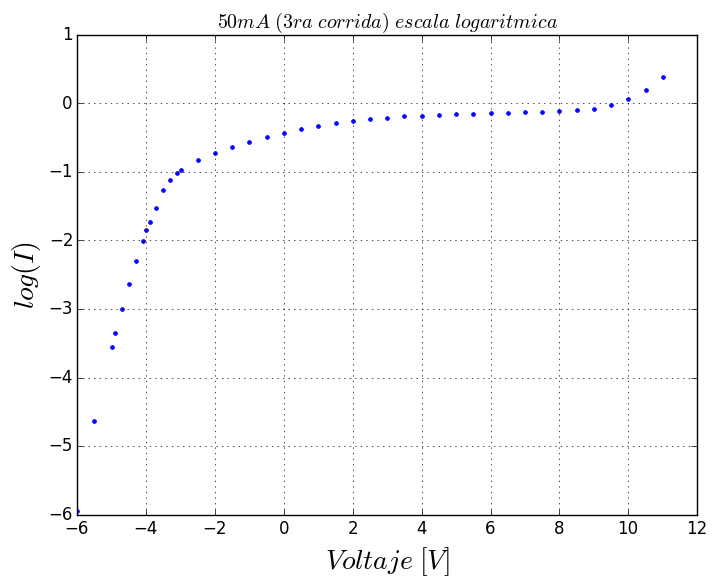

In [57]:
V3=zeros(43) #3ra corrida
I3=zeros(43)
for i in 1:43
    V3[i]=fiftymA[i,1]
    I3[i]=fiftymA[i,4]
end 
plot(V3,log(I3),"b.")
title(L"50mA  \ (3ra \ corrida) \ escala \ logaritmica")
xlabel(L"Voltaje \ [V]",size=20)
ylabel(L"log(I)",size=20);
axis([-6,12,-6,1])
grid("on")

In [58]:
model(x,p)=p[1]x+p[2] #queremos ajustar una recta en la grafica semilog
m=12 #numero de puntos con los que se sjusta la recta en la region C
x1=zeros(m)
y1=zeros(m)
for i in 1:m #PARA HACER UN MEJOR AJUSTE HAY QUE JUGAR CON LOS PUNTOS DE LA RECTA QUE SE ESCOGEn CON LOS INDICES 
    x1[i]=V3[i+1] #DE DONDE A DONDE CORRE LA i
    y1[i]=I3[i+1]
end 
fit1=curve_fit(model,x1,log(y1),[0.5,0.5])
p1=fit1.param

n=20#numero de puntos con los que se ajusta la curva en la región E
x2=zeros(n)
y2=zeros(n)
for i in 1:n
    x2[i]=V3[i+20]
    y2[i]=I3[i+20]
end 

fit2=curve_fit(model,x2,log((y2)),[0.5,0.5])
p2=fit2.param

x1=linspace(-6,-2,30)
y1=(p1[1]x1+p1[2])
x2=linspace(-6,12,30)
y2=(p2[1]x2+p2[2])
errors1 = estimate_errors(fit1, 0.95)
errors2=estimate_errors(fit2,0.95)
println(p1),println(p2)

println(errors1),println(errors2);

[1.5884192129775272,4.390309709566966]
[0.032502722047308565,-0.3470860434678541]
[0.12783483362099446,0.553467256617593]
[0.004674421749658471,0.02597355389953374]


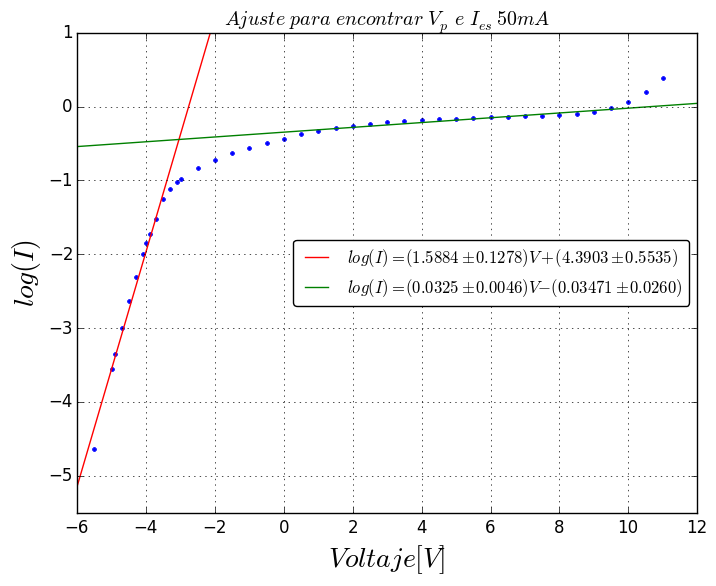

In [59]:
plot(V3,log(I3),"b.")
plot(x1,y1,"r",label=L"log(I)=(1.5884 \pm 0.1278)V+(4.3903 \pm 0.5535)")
plot(x2,y2,"g",label=L"log(I)=(0.0325 \pm 0.0046)V-(0.03471 \pm 0.0260)")
title(L"Ajuste \ para \ encontrar \ V_p \ e  \ I_{es} \ 50mA")
legend(loc="center right",fancybox="true",fontsize="medium")
xlabel(L"Voltaje[V]",size=20)
ylabel(L"log(I)",size=20)
axis([-6,12,-5.5,1])
grid("on")  

In [60]:
#determinar la intersección de las rectas para intersección de las rectas

Vp=(p2[2]-p1[2])/(p1[1]-p2[1]) 
logVp=model(Vp,p1) #evaluamos cualquiera de las dos rectas definidas por la función model, y encontramos el logaritmo 
                    #de Vp que es el punto que aparece en la grafica anterior 
Ip=exp(logVp)
println(logVp)
println("El voltaje flotante es ",Vp," V"),println("La corriente de saturación de electrones es ",Ip,"mA");

#Incertidumbres
a=-(p2[2]-p1[2])/((p1[1]-p2[1])^2)
b=-1/(p1[1]-p2[1])
c=(p2[2]-p1[2])/((p1[1]-p2[1])^2)
d=-b
suma=a^2*(errors1[1]^2)+b^2*(errors1[2]^2)+c^2*(errors2[1]^2)+b^2*(errors2[2]^2)
dVp=sqrt(suma)

f=exp(logVp)*(Vp+a)
g=exp(logVp)*(p1[1]*b+1)
h=exp(logVp)*(p1[1]*c)
j=exp(logVp)*p1[1]*d
suma=f^2*(errors1[1]^2)+g^2*(errors1[2]^2)+h^2*(errors2[1]^2)+j^2*(errors2[2]^2)
dIp=sqrt(suma)

println("La incertidumbre de Vp es ",dVp," V")
println("La incertidumbre en la corriente de saturación de electrones Ies resulta en ", dIp," mA")

-0.44604910368770767
El voltaje flotante es -3.0447622225550974 V
La corriente de saturación de electrones es 0.6401523374494122mA
La incertidumbre de Vp es 0.43528967752373265 V
La incertidumbre en la corriente de saturación de electrones Ies resulta en 0.09140444069394763 mA


In [61]:
#1 TEMPERATURAS
Vf=-6.25
T1=(2*e/k)*(Vp-Vf)/log(2M/(π*me))
a=(2*e/k)/log(2M/(π*me))
b=(-2*e/k)/log(2M/(π*me))
dT1=sqrt(a^2*dVp^2+b^2*0.05^2)
#2
T2=(e/k)*(Vf-Vp)/log(0.6*sqrt(2*π*me/M))
a=(e/k)/log(0.6*sqrt(2*π*me/M))
b=-a
dT2=sqrt(a^2*0.05^2+b^2*dVp^2)
#3
Ie2=exp(model(-5,p1))
Ie1=exp(model(-4,p1))
T3=(-5+4)/log(Ie2/Ie1) #le falta un factor de e/k

a=1/log(Ie2/Ie1)
b=-a
c=(-5+4)/(Ie1*(log(Ie2/Ie1)^2))
d=(-4+5)*(Ie2/Ie1^2)/(log(Ie2/Ie1)^2)
dT3=sqrt(a^2*0.05^2+b^2*0.05+c^2*0.05^2^2+d^2*0.05^2)
println("T1= ",T1," +/- ",dT1," Kelvin")
println("T2= ",T2," +/- ",dT2," Kelvin")
println("T3= ",T3," +/- ",dT3,"en electron Volts")
println("T3= ",(e/k)*T3," +/- ",(e/k)*dT3," Kelvin")
println("Por otro aldo el inverso de la pendiente ajustada da una tempreatura de ", (e/k)*1/p1[1]," +/- ", (e/k)*sqrt((1/p1[1]^4)*errors1[1]^2))
Te=(T1+T2+(e/k)*T3)/3
dTe=sqrt((dT1)^2+(dT2)^2+(dT3)^2)
Tp503=Te
dTp503=dTe
println("El promedio de estas temperaturas es ",Te, " +/- ",dTe," Kelvin")
#faltan las incertidumbres de estas mediciones y la densidad de electrones.

T1= 6923.751484662398 +/- 946.4680015285929 Kelvin
T2= 7166.987993096435 +/- 979.7181221526988 Kelvin
T3= 0.629556726479956 +/- 0.14727202647384524en electron Volts
T3= 7305.703184649857 +/- 1709.0210739795264 Kelvin
Por otro aldo el inverso de la pendiente ajustada da una tempreatura de 7305.703184649857 +/- 587.957727697982
El promedio de estas temperaturas es 7132.147554136231 +/- 1362.2221913039696 Kelvin


In [62]:
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Te))
Ne=sq*(4*Ip*0.001)/(e*A) #Densidad de electrones multiplique por el factor 0.001 por que la corriente está en mA
a=sq*4/(e*A)
b=4*Ip*0.001/(2*(sq)*e*A)
c=a*(1/A)
dNe=sqrt(a^2*(dIp*0.001)^2+b^2*dTe+c^2*dA^2) #INCERTIDUMBRE HORRIBLE!!!!

println("La densidad de electrones es ",Ne," +/- ",dNe)

La densidad de electrones es 3.7855974476767027e18 +/- 1.9230169207183895e31


In [64]:
Tp=(Tp501+Tp502+Tp503)/3
dTp=min(dTp501,dTp502,dTp503)
println(Tp)
println(dTp)
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Tp))
Ne=sq*(4*Ip*0.001)/(e*A)

6913.580764254108
1362.2221913039696


3.844971009149917e18

#-) 40mA

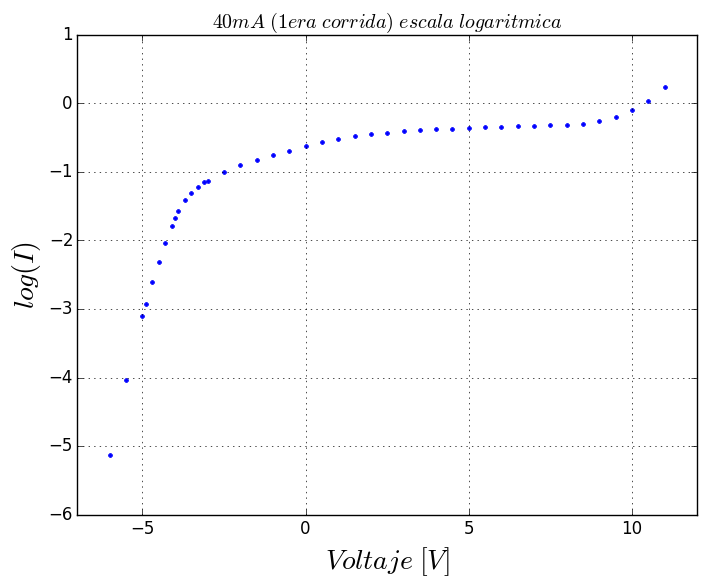

In [65]:
V1=zeros(44) #1era corrida 
I1=zeros(44)
for i in 1:44
    V1[i]=fourtymA[i,1]
    I1[i]=fourtymA[i,2]
end 
plot(V1,log(I1),"b.")
title(L"40mA \ (1era \ corrida) \ escala \ logaritmica")
xlabel(L"Voltaje \ [V]",size=20)
ylabel(L"log(I)",size=20);
axis([-7,12,-6,1])
grid("on")

In [66]:
model(x,p)=p[1]x+p[2] #queremos ajustar una recta en la grafica semilog
m=12 #numero de puntos con los que se sjusta la recta en la region C
x1=zeros(m)
y1=zeros(m)
for i in 1:m #PARA HACER UN MEJOR AJUSTE HAY QUE JUGAR CON LOS PUNTOS DE LA RECTA QUE SE ESCOGEn CON LOS INDICES 
    x1[i]=V1[i+1] #DE DONDE A DONDE CORRE LA i
    y1[i]=I1[i+1]
end 
fit1=curve_fit(model,x1,log(y1),[0.5,0.5])
p1=fit1.param

n=21 #numero de puntos con los que se ajusta la curva en la región E

x2=zeros(n)
y2=zeros(n)
for i in 1:n
    x2[i]=V1[i+20]
    y2[i]=I1[i+20]
end 

fit2=curve_fit(model,x2,log((y2)),[0.5,0.5])
p2=fit2.param

x1=linspace(-6.5,-2,30)
y1=(p1[1]x1+p1[2])
x2=linspace(-6,12,30)
y2=(p2[1]x2+p2[2])
errors1 = estimate_errors(fit1, 0.95)
errors2=estimate_errors(fit2,0.95)
println(p1),println(p2)

println(errors1),println(errors2);


[1.5252814219327153,4.385050881069537]
[0.036594132399605156,-0.5670310199655137]
[0.14917246267072276,0.6809441072114703]
[0.00518372924256263,0.02811506157373984]


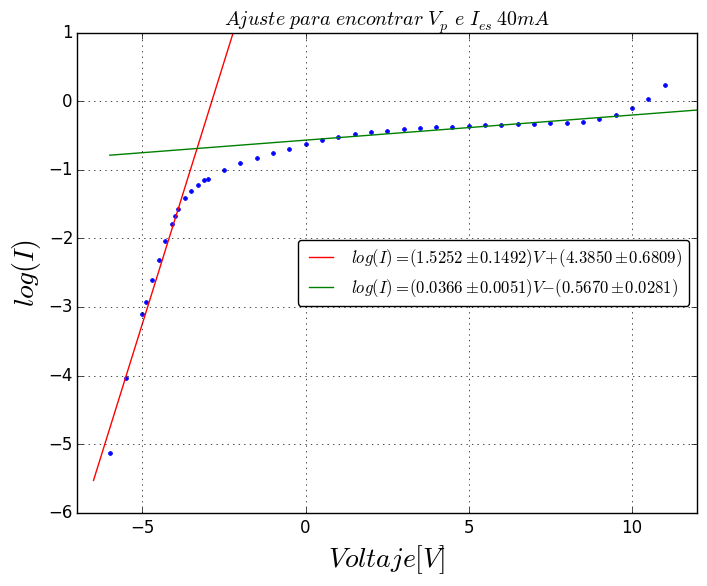

In [67]:
plot(V1,log(I1),"b.")
plot(x1,y1,"r",label=L"log(I)=(1.5252 \pm 0.1492)V+(4.3850 \pm 0.6809)")
plot(x2,y2,"g",label=L"log(I)=(0.0366 \pm 0.0051)V-(0.5670 \pm 0.0281)")
title(L"Ajuste \ para \ encontrar \ V_p \ e  \ I_{es} \ 40mA")
legend(loc="center right",fancybox="true",fontsize="medium")
xlabel(L"Voltaje[V]",size=20)
ylabel(L"log(I)",size=20)
axis([-7,12,-6,1])
grid("on")  

In [68]:
#determinar la intersección de las rectas para intersección de las rectas

Vp=(p2[2]-p1[2])/(p1[1]-p2[1]) 
logVp=model(Vp,p1) #evaluamos cualquiera de las dos rectas definidas por la función model, y encontramos el logaritmo 
                    #de Vp que es el punto que aparece en la grafica anterior 
Ip=exp(logVp)
println(logVp)
println("El voltaje flotante es ",Vp," V"),println("La corriente de saturación de electrones es ",Ip,"mA");

#Incertidumbres
a=-(p2[2]-p1[2])/((p1[1]-p2[1])^2)
b=-1/(p1[1]-p2[1])
c=(p2[2]-p1[2])/((p1[1]-p2[1])^2)
d=-b
suma=a^2*(errors1[1]^2)+b^2*(errors1[2]^2)+c^2*(errors2[1]^2)+b^2*(errors2[2]^2)
dVp=sqrt(suma)

f=exp(logVp)*(Vp+a)
g=exp(logVp)*(p1[1]*b+1)
h=exp(logVp)*(p1[1]*c)
j=exp(logVp)*p1[1]*d
suma=f^2*(errors1[1]^2)+g^2*(errors1[2]^2)+h^2*(errors2[1]^2)+j^2*(errors2[2]^2)
dIp=sqrt(suma)

println("La incertidumbre de Vp es ",dVp," V")
println("La incertidumbre en la corriente de saturación de electrones Ies resulta en ", dIp," mA")

-0.6887605074235541
El voltaje flotante es -3.3264755706943316 V
La corriente de saturación de electrones es 0.5021981543355779mA
La incertidumbre de Vp es 0.5664127329299101 V
La incertidumbre en la corriente de saturación de electrones Ies resulta en 0.08396779640024703 mA


In [69]:
#1 TEMPERATURAS
Vf=-6.25
T1=(2*e/k)*(Vp-Vf)/log(2M/(π*me))
a=(2*e/k)/log(2M/(π*me))
b=(-2*e/k)/log(2M/(π*me))
dT1=sqrt(a^2*dVp^2+b^2*0.05^2)
#2
T2=(e/k)*(Vf-Vp)/log(0.6*sqrt(2*π*me/M))
a=(e/k)/log(0.6*sqrt(2*π*me/M))
b=-a
dT2=sqrt(a^2*0.05^2+b^2*dVp^2)
#3
Ie2=exp(model(-5,p1))
Ie1=exp(model(-4,p1))
T3=(-5+4)/log(Ie2/Ie1) #le falta un factor de e/k

a=1/log(Ie2/Ie1)
b=-a
c=(-5+4)/(Ie1*(log(Ie2/Ie1)^2))
d=(-4+5)*(Ie2/Ie1^2)/(log(Ie2/Ie1)^2)
dT3=sqrt(a^2*0.05^2+b^2*0.05+c^2*0.05^2^2+d^2*0.05^2)
println("T1= ",T1," +/- ",dT1," Kelvin")
println("T2= ",T2," +/- ",dT2," Kelvin")
println("T3= ",T3," +/- ",dT3,"en electron Volts")
println("T3= ",(e/k)*T3," +/- ",(e/k)*dT3," Kelvin")
println("Por otro aldo el inverso de la pendiente ajustada da una tempreatura de ", (e/k)*1/p1[1]," +/- ", (e/k)*sqrt((1/p1[1]^4)*errors1[1]^2))
Te=(T1+T2+(e/k)*T3)/3
dTe=sqrt((dT1)^2+(dT2)^2+(dT3)^2)
Tp401=Te
dTp401=dTe
println("El promedio de estas temperaturas es ",Te, " +/- ",dTe," Kelvin")
#faltan las incertidumbres de estas mediciones y la densidad de electrones.

T1= 6315.212166252419 +/- 1228.2867764884602 Kelvin
T2= 6537.070238533344 +/- 1271.4373990274958 Kelvin
T3= 0.6556167180826734 +/- 0.15257282759689914en electron Volts
T3= 7608.116860234631 +/- 1770.5343229323564 Kelvin
Por otro aldo el inverso de la pendiente ajustada da una tempreatura de 7608.116860234629 +/- 744.0735276836743
El promedio de estas temperaturas es 6820.1330883401315 +/- 1767.8352548302355 Kelvin


In [70]:
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Te))
Ne=sq*(4*Ip*0.001)/(e*A) #Densidad de electrones multiplique por el factor 0.001 por que la corriente está en mA
a=sq*4/(e*A)
b=4*Ip*0.001/(2*(sq)*e*A)
c=a*(1/A)
dNe=sqrt(a^2*(dIp*0.001)^2+b^2*dTe+c^2*dA^2) #INCERTIDUMBRE HORRIBLE!!!!

println("La densidad de electrones es ",Ne," +/- ",dNe)

La densidad de electrones es 3.036966083422104e18 +/- 1.680575651562974e31


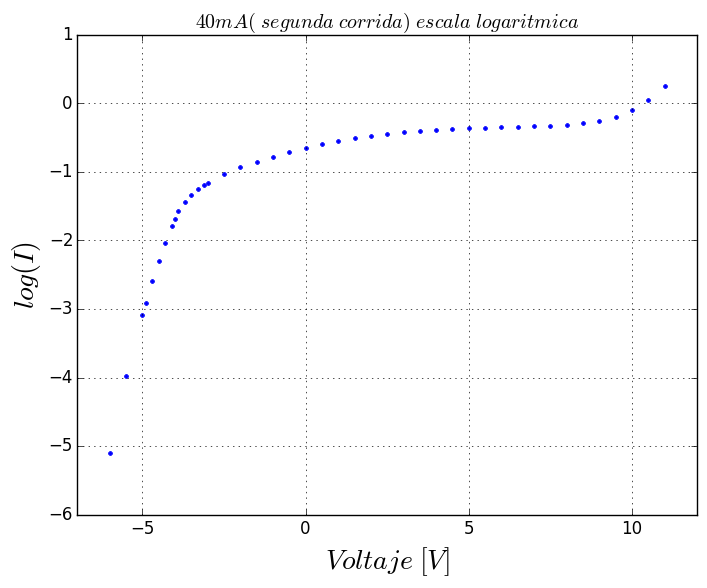

In [71]:
V2=zeros(44) #2da corrida
I2=zeros(44)
for i in 1:44
    V2[i]=fourtymA[i,1]
    I2[i]=fourtymA[i,3]
end 
plot(V2,log(I2),"b.")
title(L"40mA  ( \ segunda \ corrida ) \ escala \ logaritmica")
xlabel(L"Voltaje \ [V]",size=20)
ylabel(L"log(I)",size=20);
grid("on")
axis([-7,12,-6,1]);

In [72]:
model(x,p)=p[1]x+p[2] #queremos ajustar una recta en la grafica semilog
m=11 #numero de puntos con los que se sjusta la recta en la region C
x1=zeros(m)
y1=zeros(m)
for i in 1:m #PARA HACER UN MEJOR AJUSTE HAY QUE JUGAR CON LOS PUNTOS DE LA RECTA QUE SE ESCOGEn CON LOS INDICES 
    x1[i]=V2[i+1] #DE DONDE A DONDE CORRE LA i
    y1[i]=I2[i+1]
end 
fit1=curve_fit(model,x1,log(y1),[0.5,0.5])
p1=fit1.param

n=20 #numero de puntos con los que se ajusta la curva en la región E
x2=zeros(n)
y2=zeros(n)
for i in 1:n
    x2[i]=V2[i+21]
    y2[i]=I2[i+21]
end 

fit2=curve_fit(model,x2,log((y2)),[0.5,0.5])
p2=fit2.param

x1=linspace(-6,-2,30)
y1=(p1[1]x1+p1[2])
x2=linspace(-6,12,30)
y2=(p2[1]x2+p2[2])
errors1 = estimate_errors(fit1, 0.95)
errors2=estimate_errors(fit2,0.95)
println(p1),println(p2)

println(errors1),println(errors2);


[1.5769310492522255,4.664939854994653]
[0.036309943136721694,-0.5692504043889887]
[0.14001223953396666,0.6509919000268011]
[0.00467173096325809,0.025958602470147335]


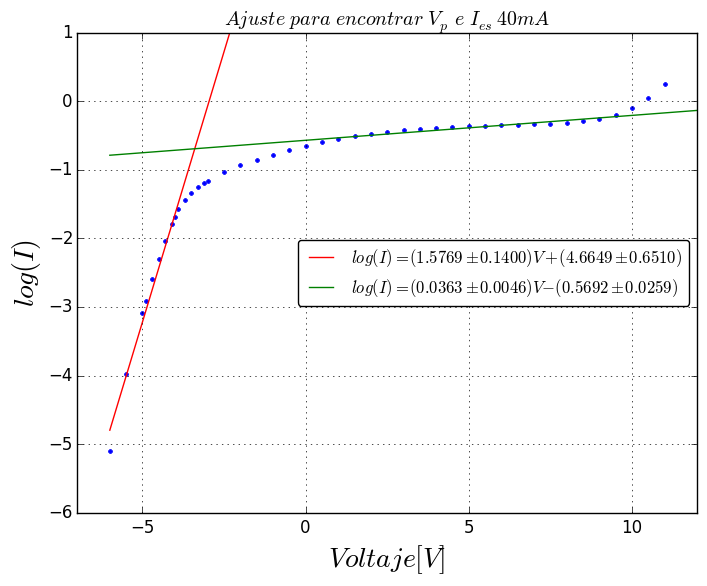

In [73]:
plot(V2,log(I2),"b.")
plot(x1,y1,"r",label=L"log(I)=(1.5769 \pm 0.1400)V+(4.6649 \pm 0.6510)")
plot(x2,y2,"g",label=L"log(I)=(0.0363 \pm 0.0046)V-(0.5692 \pm 0.0259)")
title(L"Ajuste \ para \ encontrar \ V_p \ e  \ I_{es} \ 40mA")
legend(loc="center right",fancybox="true",fontsize="medium")
xlabel(L"Voltaje[V]",size=20)
ylabel(L"log(I)",size=20)
axis([-7,12,-6,1])
grid("on")  #QUIZAS PUEDA AJUSTAR MEJOR LA RECTA AZUL

In [74]:
#determinar la intersección de las rectas para intersección de las rectas

Vp=(p2[2]-p1[2])/(p1[1]-p2[1]) 
logVp=model(Vp,p1) #evaluamos cualquiera de las dos rectas definidas por la función model, y encontramos el logaritmo 
                    #de Vp que es el punto que aparece en la grafica anterior 
Ip=exp(logVp)
println(logVp)
println("El voltaje flotante es ",Vp," V"),println("La corriente de saturación de electrones es ",Ip,"mA");

#Incertidumbres
a=-(p2[2]-p1[2])/((p1[1]-p2[1])^2)
b=-1/(p1[1]-p2[1])
c=(p2[2]-p1[2])/((p1[1]-p2[1])^2)
d=-b
suma=a^2*(errors1[1]^2)+b^2*(errors1[2]^2)+c^2*(errors2[1]^2)+b^2*(errors2[2]^2)
dVp=sqrt(suma)

f=exp(logVp)*(Vp+a)
g=exp(logVp)*(p1[1]*b+1)
h=exp(logVp)*(p1[1]*c)
j=exp(logVp)*p1[1]*d
suma=f^2*(errors1[1]^2)+g^2*(errors1[2]^2)+h^2*(errors2[1]^2)+j^2*(errors2[2]^2)
dIp=sqrt(suma)

println("La incertidumbre de Vp es ",dVp," V")
println("La incertidumbre en la corriente de saturación de electrones Ies resulta en ", dIp," mA")

-0.6926117876198079
El voltaje flotante es -3.3974545971144336 V
La corriente de saturación de electrones es 0.5002677681442596mA
La incertidumbre de Vp es 0.5237116103614228 V
La incertidumbre en la corriente de saturación de electrones Ies resulta en 0.08529337025731289 mA


In [75]:
#1 TEMPERATURAS
Vf=-6.25
T1=(2*e/k)*(Vp-Vf)/log(2M/(π*me))
a=(2*e/k)/log(2M/(π*me))
b=(-2*e/k)/log(2M/(π*me))
dT1=sqrt(a^2*dVp^2+b^2*0.05^2)
#2
T2=(e/k)*(Vf-Vp)/log(0.6*sqrt(2*π*me/M))
a=(e/k)/log(0.6*sqrt(2*π*me/M))
b=-a
dT2=sqrt(a^2*0.05^2+b^2*dVp^2)
#3
Ie2=exp(model(-5,p1))
Ie1=exp(model(-4,p1))
T3=(-5+4)/log(Ie2/Ie1) #le falta un factor de e/k

a=1/log(Ie2/Ie1)
b=-a
c=(-5+4)/(Ie1*(log(Ie2/Ie1)^2))
d=(-4+5)*(Ie2/Ie1^2)/(log(Ie2/Ie1)^2)
dT3=sqrt(a^2*0.05^2+b^2*0.05+c^2*0.05^2^2+d^2*0.05^2)
println("T1= ",T1," +/- ",dT1," Kelvin")
println("T2= ",T2," +/- ",dT2," Kelvin")
println("T3= ",T3," +/- ",dT3,"en electron Volts")
println("T3= ",(e/k)*T3," +/- ",(e/k)*dT3," Kelvin")
println("Por otro aldo el inverso de la pendiente ajustada da una tempreatura de ", (e/k)*1/p1[1]," +/- ", (e/k)*sqrt((1/p1[1]^4)*errors1[1]^2))
Te=(T1+T2+(e/k)*T3)/3
dTe=sqrt((dT1)^2+(dT2)^2+(dT3)^2)
Tp402=Te
dTp402=dTe
println("El promedio de estas temperaturas es ",Te, " +/- ",dTe," Kelvin")
#faltan las incertidumbres de estas mediciones y la densidad de electrones.

T1= 6161.887772344946 +/- 1136.432765178477 Kelvin
T2= 6378.359445314106 +/- 1176.3564883918805 Kelvin
T3= 0.6341431354745638 +/- 0.14697084560026188en electron Volts
T3= 7358.92625635836 +/- 1705.5260147183915 Kelvin
Por otro aldo el inverso de la pendiente ajustada da una tempreatura de 7358.92625635836 +/- 653.3828769537046
El promedio de estas temperaturas es 6633.057824672472 +/- 1635.6326113016044 Kelvin


In [76]:
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Te))
Ne=sq*(4*Ip*0.001)/(e*A) #Densidad de electrones multiplique por el factor 0.001 por que la corriente está en mA
a=sq*4/(e*A)
b=4*Ip*0.001/(2*(sq)*e*A)
c=a*(1/A)
dNe=sqrt(a^2*(dIp*0.001)^2+b^2*dTe+c^2*dA^2) #INCERTIDUMBRE HORRIBLE!!!!

println("La densidad de electrones es ",Ne," +/- ",dNe)

La densidad de electrones es 3.0676576101711396e18 +/- 1.588063739278506e31


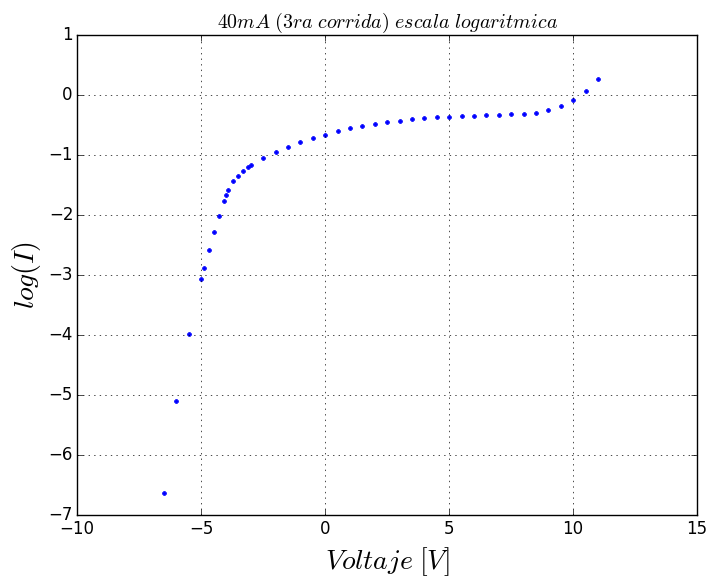

In [77]:
V3=zeros(44) #3ra corrida
I3=zeros(44)
for i in 1:44
    V3[i]=fourtymA[i,1]
    I3[i]=fourtymA[i,4]
end 
plot(V3,log(I3),"b.")
title(L"40mA  \ (3ra \ corrida) \ escala \ logaritmica")
xlabel(L"Voltaje \ [V]",size=20)
ylabel(L"log(I)",size=20);
#axis([-7,12,-6,1])
grid("on")

In [78]:
model(x,p)=p[1]x+p[2] #queremos ajustar una recta en la grafica semilog
m=13 #numero de puntos con los que se sjusta la recta en la region C
x1=zeros(m)
y1=zeros(m)
for i in 1:m #PARA HACER UN MEJOR AJUSTE HAY QUE JUGAR CON LOS PUNTOS DE LA RECTA QUE SE ESCOGEn CON LOS INDICES 
    x1[i]=V3[i] #DE DONDE A DONDE CORRE LA i
    y1[i]=I3[i]
end 
fit1=curve_fit(model,x1,log(y1),[0.5,0.5])
p1=fit1.param

n=20#numero de puntos con los que se ajusta la curva en la región E
x2=zeros(n)
y2=zeros(n)
for i in 1:n
    x2[i]=V3[i+21]
    y2[i]=I3[i+21]
end 

fit2=curve_fit(model,x2,log((y2)),[0.5,0.5])
p2=fit2.param

x1=linspace(-6,-2,30)
y1=(p1[1]x1+p1[2])
x2=linspace(-6,12,30)
y2=(p2[1]x2+p2[2])
errors1 = estimate_errors(fit1, 0.95)
errors2=estimate_errors(fit2,0.95)
println(p1),println(p2)

println(errors1),println(errors2);

[1.7181065394525359,5.2064825385954085]
[0.03794124934631401,-0.5835121214459942]
[0.19512904989143318,0.9252618618287182]
[0.004727203987174856,0.02626683986373818]


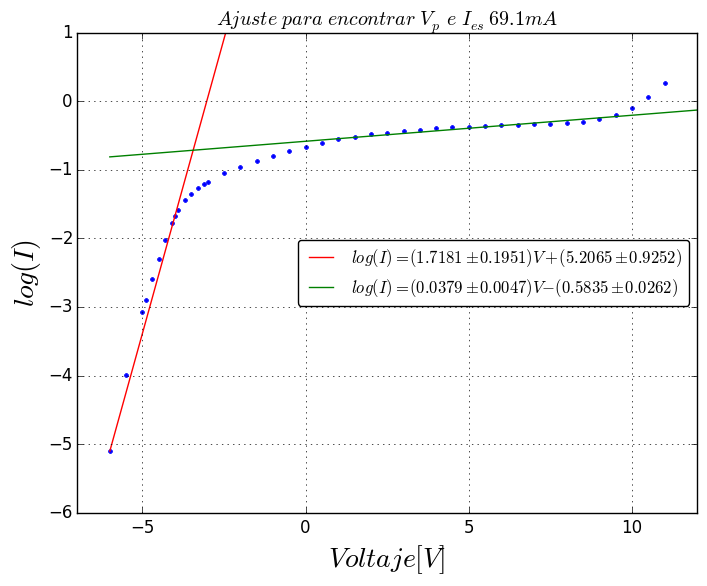

In [79]:
plot(V3,log(I3),"b.")
plot(x1,y1,"r",label=L"log(I)=(1.7181 \pm 0.1951)V+(5.2065 \pm 0.9252)")
plot(x2,y2,"g",label=L"log(I)=(0.0379 \pm 0.0047)V-(0.5835 \pm 0.0262)")
title(L"Ajuste \ para \ encontrar \ V_p \ e  \ I_{es} \ 69.1mA")
legend(loc="center right",fancybox="true",fontsize="medium")
xlabel(L"Voltaje[V]",size=20)
ylabel(L"log(I)",size=20)
axis([-7,12,-6,1])
grid("on")  #QUIZAS PUEDA AJUSTAR MEJOR LA RECTA AZUL

In [80]:
#determinar la intersección de las rectas para intersección de las rectas

Vp=(p2[2]-p1[2])/(p1[1]-p2[1]) 
logVp=model(Vp,p1) #evaluamos cualquiera de las dos rectas definidas por la función model, y encontramos el logaritmo 
                    #de Vp que es el punto que aparece en la grafica anterior 
Ip=exp(logVp)
println(logVp)
println("El voltaje flotante es ",Vp," V"),println("La corriente de saturación de electrones es ",Ip,"mA");

#Incertidumbres
a=-(p2[2]-p1[2])/((p1[1]-p2[1])^2)
b=-1/(p1[1]-p2[1])
c=(p2[2]-p1[2])/((p1[1]-p2[1])^2)
d=-b
suma=a^2*(errors1[1]^2)+b^2*(errors1[2]^2)+c^2*(errors2[1]^2)+b^2*(errors2[2]^2)
dVp=sqrt(suma)

f=exp(logVp)*(Vp+a)
g=exp(logVp)*(p1[1]*b+1)
h=exp(logVp)*(p1[1]*c)
j=exp(logVp)*p1[1]*d
suma=f^2*(errors1[1]^2)+g^2*(errors1[2]^2)+h^2*(errors2[1]^2)+j^2*(errors2[2]^2)
dIp=sqrt(suma)

println("La incertidumbre de Vp es ",dVp," V")
println("La incertidumbre en la corriente de saturación de electrones Ies resulta en ", dIp," mA")

-0.7142609426507036
El voltaje flotante es -3.446086342895081 V
La corriente de saturación de electrones es 0.4895537864544671mA
La incertidumbre de Vp es 0.6810136310140938 V
La incertidumbre en la corriente de saturación de electrones Ies resulta en 0.13454805879763493 mA


In [81]:
#1 TEMPERATURAS
Vf=-6.25
T1=(2*e/k)*(Vp-Vf)/log(2M/(π*me))
a=(2*e/k)/log(2M/(π*me))
b=(-2*e/k)/log(2M/(π*me))
dT1=sqrt(a^2*dVp^2+b^2*0.05^2)
#2
T2=(e/k)*(Vf-Vp)/log(0.6*sqrt(2*π*me/M))
a=(e/k)/log(0.6*sqrt(2*π*me/M))
b=-a
dT2=sqrt(a^2*0.05^2+b^2*dVp^2)
#3
Ie2=exp(model(-5,p1))
Ie1=exp(model(-4,p1))
T3=(-5+4)/log(Ie2/Ie1) #le falta un factor de e/k

a=1/log(Ie2/Ie1)
b=-a
c=(-5+4)/(Ie1*(log(Ie2/Ie1)^2))
d=(-4+5)*(Ie2/Ie1^2)/(log(Ie2/Ie1)^2)
dT3=sqrt(a^2*0.05^2+b^2*0.05+c^2*0.05^2^2+d^2*0.05^2)
println("T1= ",T1," +/- ",dT1," Kelvin")
println("T2= ",T2," +/- ",dT2," Kelvin")
println("T3= ",T3," +/- ",dT3,"en electron Volts")
println("T3= ",(e/k)*T3," +/- ",(e/k)*dT3," Kelvin")
println("Por otro aldo el inverso de la pendiente ajustada da una tempreatura de ", (e/k)*1/p1[1]," +/- ", (e/k)*sqrt((1/p1[1]^4)*errors1[1]^2))
Te=(T1+T2+(e/k)*T3)/3
dTe=sqrt((dT1)^2+(dT2)^2+(dT3)^2)
Tp403=Te
dTp403=dTe
println("El promedio de estas temperaturas es ",Te, " +/- ",dTe," Kelvin")
#faltan las incertidumbres de estas mediciones y la densidad de electrones.

T1= 6056.836557605147 +/- 1475.0420802875917 Kelvin
T2= 6269.617703735401 +/- 1526.8613990770107 Kelvin
T3= 0.5820360827673958 +/- 0.13440154333972515en electron Volts
T3= 6754.248957405546 +/- 1559.6653040131528 Kelvin
Por otro aldo el inverso de la pendiente ajustada da una tempreatura de 6754.248957405545 +/- 767.0945610908994
El promedio de estas temperaturas es 6360.234406248698 +/- 2122.9825455416085 Kelvin


In [82]:
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Te))
Ne=sq*(4*Ip*0.001)/(e*A) #Densidad de electrones multiplique por el factor 0.001 por que la corriente está en mA
a=sq*4/(e*A)
b=4*Ip*0.001/(2*(sq)*e*A)
c=a*(1/A)
dNe=sqrt(a^2*(dIp*0.001)^2+b^2*dTe+c^2*dA^2) #INCERTIDUMBRE HORRIBLE!!!!

println("La densidad de electrones es ",Ne," +/- ",dNe)

La densidad de electrones es 3.065667906034095e18 +/- 1.7337074742058582e31


In [84]:
Tp=(Tp401+Tp402+Tp403)/3
dTp=min(dTp401,dTp402,dTp403)
println(Tp)
println(dTp)
#densidad de electrones 
d=0.00078
h=0.00421
A=π*d^2*h #area de la punta de langmuir
dA=sqrt((2π*d*h)^2*0.00005^2+π*d^2*0.00005^2)
sq=sqrt(me*π/(8*k*Tp))
Ne=sq*(4*Ip*0.001)/(e*A)

6604.475106420435
1635.6326113016044


3.008448036141745e18